# Artificial Intelligence Project - (Unit I) 

## 1.- Import data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
#Load data from csv and store it in dataframe
data = pd.read_csv('HCV-Egy-Data.csv') 

# Showing the first rows.
data.head()

,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue & generalized bone ache,Jaundice,Epigastric pain,...,ALT 36,ALT 48,ALT after 24 w,RNA Base,RNA 4,RNA 12,RNA EOT,RNA EF,Baseline histological Grading,Baselinehistological staging
0,56,1,35,2,1,1,1,2,2,2,...,5,5,5,655330,634536,288194,5,5,13,2
1,46,1,29,1,2,2,1,2,2,1,...,57,123,44,40620,538635,637056,336804,31085,4,2
2,57,1,33,2,2,2,2,1,1,1,...,5,5,5,571148,661346,5,735945,558829,4,4
3,49,2,33,1,2,1,2,1,2,1,...,48,77,33,1041941,449939,585688,744463,582301,10,3
4,59,1,32,1,1,2,1,2,2,2,...,94,90,30,660410,738756,3731527,338946,242861,11,1


## 2.- Data set description - "Hepatitis C Virus (HCV) for Egyptian patients" 

Egyptian patients who underwent HCV treatment dosages for about 18 months. 

Discretization should be applied based on expert recommendations. There is an attached file which shows how the different features followed a certain discretization and what are the different values that each feature can take.

In the next list every feature inside the database is present, and between parenthesis, the possible range of values that each one of these variables can take is written.

* Age: Age (32:61)
* Gender: Gender (Male=1, Female=2)
* BMI: Body Mass Index (22:35)
* Fever: Fever (Absent=1, Present=2)
* Nausea/Vomting: Nausea/Vomting (Absent=1, Present=2)
* Headache: Headache (Absent=1, Present=2)
* Diarrhea: Diarrhea (Absent=1, Present=2)
* Fatigue & generalized bone ache: Fatigue & generalized bone ache (Absent=1, Present=2)
* Jaundice: Jaundice (Absent=1, Present=2)
* Epigastric pain: Epigastric pain (Absent=1, Present=2)
* WBC: White blood cell (2991:12101)
* RBC: red blood cells (3816422:5018451)
* HGB: Hemoglobin (2:20)
* Plat: Platelets (93013:226464)
* AST 1 aspartate transaminase ratio (39:128)
* ALT 1 alanine transaminase ratio 1 week (39:128)
* ALT 4 alanine transaminase ratio 12 weeks (39:128)
* ALT 12 alanine transaminase ratio 4 weeks (39:128)
* ALT 24 alanine transaminase ratio 24 weeks (39:128)
* ALT 36 alanine transaminase ratio 36 weeks (5:128)
* ALT 48 alanine transaminase ratio 48 weeks (5:128)
* ALT after 24 w alanine transaminase ratio 24 weeks (5:45)
* RNA Base: RNA Base (11:1201086)
* RNA 4: RNA 4 (5:1201715)
* RNA 12: RNA 12 (5:3731527)
* RNA EOT: RNA end-of-treatment (5:808450)
* RNA EF: RNA Elongation Factor (5:808450)
* Baseline histological Grading: Baseline histological Grading (3:16)
* Baselinehistological staging: Baseline histological staging (1:4)

#### a) Indicating the type each variable is (numerical, categorical, etc.).

In [3]:
data.dtypes

Age                                 int64
Gender                              int64
BMI                                 int64
Fever                               int64
Nausea/Vomting                      int64
Headache                            int64
Diarrhea                            int64
Fatigue & generalized bone ache     int64
Jaundice                            int64
Epigastric pain                     int64
WBC                                 int64
RBC                                 int64
HGB                                 int64
Plat                                int64
AST 1                               int64
ALT 1                               int64
ALT4                                int64
ALT 12                              int64
ALT 24                              int64
ALT 36                              int64
ALT 48                              int64
ALT after 24 w                      int64
RNA Base                            int64
RNA 4                             

#### b) Column names

In [4]:
data.columns

Index(['Age ', 'Gender', 'BMI', 'Fever', 'Nausea/Vomting', 'Headache ',
       'Diarrhea ', 'Fatigue & generalized bone ache ', 'Jaundice ',
       'Epigastric pain ', 'WBC', 'RBC', 'HGB', 'Plat', 'AST 1', 'ALT 1',
       'ALT4', 'ALT 12', 'ALT 24', 'ALT 36', 'ALT 48', 'ALT after 24 w',
       'RNA Base', 'RNA 4', 'RNA 12', 'RNA EOT', 'RNA EF',
       'Baseline histological Grading', 'Baselinehistological staging'],
      dtype='object')

#### c) Removing column blank spaces

In [5]:
data.columns = data.columns.str.replace(' ', '')
raw_headers = data.columns
headers = [str(x) for x in raw_headers]
print(headers)

['Age', 'Gender', 'BMI', 'Fever', 'Nausea/Vomting', 'Headache', 'Diarrhea', 'Fatigue&generalizedboneache', 'Jaundice', 'Epigastricpain', 'WBC', 'RBC', 'HGB', 'Plat', 'AST1', 'ALT1', 'ALT4', 'ALT12', 'ALT24', 'ALT36', 'ALT48', 'ALTafter24w', 'RNABase', 'RNA4', 'RNA12', 'RNAEOT', 'RNAEF', 'BaselinehistologicalGrading', 'Baselinehistologicalstaging']


#### d) Adding two variables (from 'Baselinehistologicalstaging')
The new binary variable 'Outcome' indicates whether the patient has Cirrhosis or not (1 or 0) and the categorical variable 'Histologicalstaging' that indicates the histological stage of the disease.

Add a wide explanation of the paper and of these variables and why we create Outcome as a simplified way to write a multiclass variable to a binary one

Some techniques of this project have been inspired by Nasr, M. in his the paper called '[A novel model based on non invasive methods for prediction of liver fibrosis](https://www.researchgate.net/publication/323130913_A_novel_model_based_on_non_invasive_methods_for_prediction_of_liver_fibrosis)' which uses this database containing 1741 Hepatitis C virus patients who were treated with a combined therapy interferon-Alfa and ribavirin for more than 15 months. The study shows patients who *response to the treatment* (diminishing of plasma HCV RNA in blood at 12 or 24 weeks after stopping treatment) and others who does’t show a clearance of the virus were considered as *non responder*. Thus, what researchers in this paper did was creating a classifier algorithm to try to predict the risk and rate of liver fibrosis progression.

Therefore, following a similar approach as researchers did, the 'Baseline histological staging' is the class label with values F0, F1, F2, F3, F4. These labels represent different prognosis levels of Liver Fibrosis as follows: No Fibrosis (F0), Portal Fibrosis (F1), Few Septa (F2), Many Septa (F3), Cirrhosis (F4). Hence, The variable 'Histologicalstaging' was created to have these labels available inside the database. 

Moreover, the variable 'Outcome' was created to have a clear distinction between those patients who have reach a cirrhotic stage and those that have not. This variable create a binary variable from a multiclass one where the 'NoFibrosis', 'PortalFibrosis', 'FewSepta', 'ManySepta' are considered as 0 (Abscense of Cirrhosis) and only the cases with confirmed cirrhosis are labeled as 1. 

Note: following the guidelines given in the paper, the stage 'NoFibrosis' was decided to be added, even though there are no individuals bearing that stage in this dataset.

In [6]:
# Creating the variable 'Histological Staging'.
category = pd.cut(data.Baselinehistologicalstaging, right=False,
                bins=[0,1,2,3,4,5],labels=['NoFibrosis','PortalFibrosis','FewSepta','ManySepta','Cirrhosis'])
data.insert(29,'Histologicalstaging', category)
data.columns

Index(['Age', 'Gender', 'BMI', 'Fever', 'Nausea/Vomting', 'Headache',
       'Diarrhea', 'Fatigue&generalizedboneache', 'Jaundice', 'Epigastricpain',
       'WBC', 'RBC', 'HGB', 'Plat', 'AST1', 'ALT1', 'ALT4', 'ALT12', 'ALT24',
       'ALT36', 'ALT48', 'ALTafter24w', 'RNABase', 'RNA4', 'RNA12', 'RNAEOT',
       'RNAEF', 'BaselinehistologicalGrading', 'Baselinehistologicalstaging',
       'Histologicalstaging'],
      dtype='object')

In [7]:
# Creating the variable 'Outcome'.
new_var= np.where((data['Baselinehistologicalstaging'] < 4), 0,1)
data.insert(30,'Outcome', new_var) # In the 8th position.
data.columns

Index(['Age', 'Gender', 'BMI', 'Fever', 'Nausea/Vomting', 'Headache',
       'Diarrhea', 'Fatigue&generalizedboneache', 'Jaundice', 'Epigastricpain',
       'WBC', 'RBC', 'HGB', 'Plat', 'AST1', 'ALT1', 'ALT4', 'ALT12', 'ALT24',
       'ALT36', 'ALT48', 'ALTafter24w', 'RNABase', 'RNA4', 'RNA12', 'RNAEOT',
       'RNAEF', 'BaselinehistologicalGrading', 'Baselinehistologicalstaging',
       'Histologicalstaging', 'Outcome'],
      dtype='object')

In [8]:
# Identifying the type of each variable.
data.dtypes

Age                               int64
Gender                            int64
BMI                               int64
Fever                             int64
Nausea/Vomting                    int64
Headache                          int64
Diarrhea                          int64
Fatigue&generalizedboneache       int64
Jaundice                          int64
Epigastricpain                    int64
WBC                               int64
RBC                               int64
HGB                               int64
Plat                              int64
AST1                              int64
ALT1                              int64
ALT4                              int64
ALT12                             int64
ALT24                             int64
ALT36                             int64
ALT48                             int64
ALTafter24w                       int64
RNABase                           int64
RNA4                              int64
RNA12                             int64


In [9]:
# Printing the first rows of the modified dataframe.
data.head()

,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue&generalizedboneache,Jaundice,Epigastricpain,...,ALTafter24w,RNABase,RNA4,RNA12,RNAEOT,RNAEF,BaselinehistologicalGrading,Baselinehistologicalstaging,Histologicalstaging,Outcome
0,56,1,35,2,1,1,1,2,2,2,...,5,655330,634536,288194,5,5,13,2,FewSepta,0
1,46,1,29,1,2,2,1,2,2,1,...,44,40620,538635,637056,336804,31085,4,2,FewSepta,0
2,57,1,33,2,2,2,2,1,1,1,...,5,571148,661346,5,735945,558829,4,4,Cirrhosis,1
3,49,2,33,1,2,1,2,1,2,1,...,33,1041941,449939,585688,744463,582301,10,3,ManySepta,0
4,59,1,32,1,1,2,1,2,2,2,...,30,660410,738756,3731527,338946,242861,11,1,PortalFibrosis,0


## 3.- Descriptive Statistical Analysis

In [10]:
# Describe data
data.describe()

,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue&generalizedboneache,Jaundice,Epigastricpain,...,ALT48,ALTafter24w,RNABase,RNA4,RNA12,RNAEOT,RNAEF,BaselinehistologicalGrading,Baselinehistologicalstaging,Outcome
count,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,...,1385.000000,1385.000000,1.385000e+03,1.385000e+03,1.385000e+03,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000
mean,46.319134,1.489531,28.608664,1.515523,1.502527,1.496029,1.502527,1.498917,1.501083,1.503971,...,83.629603,33.438267,5.909512e+05,6.008956e+05,2.887536e+05,287660.336462,291378.290975,9.761733,2.536462,0.261372
std,8.781506,0.500071,4.076215,0.499939,0.500174,0.500165,0.500174,0.500179,0.500179,0.500165,...,26.223955,7.073569,3.539354e+05,3.623151e+05,2.853507e+05,264559.525070,267700.691713,4.023896,1.121392,0.439541
min,32.000000,1.000000,22.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,5.000000,1.100000e+01,5.000000e+00,5.000000e+00,5.000000,5.000000,3.000000,1.000000,0.000000
25%,39.000000,1.000000,25.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,61.000000,28.000000,2.692530e+05,2.708930e+05,5.000000e+00,5.000000,5.000000,6.000000,2.000000,0.000000
50%,46.000000,1.000000,29.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,...,83.000000,34.000000,5.931030e+05,5.978690e+05,2.343590e+05,251376.000000,244049.000000,10.000000,3.000000,0.000000
75%,54.000000,2.000000,32.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,106.000000,40.000000,8.867910e+05,9.090930e+05,5.248190e+05,517806.000000,527864.000000,13.000000,4.000000,1.000000
max,61.000000,2.000000,35.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,128.000000,45.000000,1.201086e+06,1.201715e+06,3.731527e+06,808450.000000,810333.000000,16.000000,4.000000,1.000000


In [11]:
# For categorical data
data.describe(include='all') 

,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue&generalizedboneache,Jaundice,Epigastricpain,...,ALTafter24w,RNABase,RNA4,RNA12,RNAEOT,RNAEF,BaselinehistologicalGrading,Baselinehistologicalstaging,Histologicalstaging,Outcome
count,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,...,1385.000000,1.385000e+03,1.385000e+03,1.385000e+03,1385.000000,1385.000000,1385.000000,1385.000000,1385,1385.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cirrhosis,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,362,NaN
mean,46.319134,1.489531,28.608664,1.515523,1.502527,1.496029,1.502527,1.498917,1.501083,1.503971,...,33.438267,5.909512e+05,6.008956e+05,2.887536e+05,287660.336462,291378.290975,9.761733,2.536462,NaN,0.261372
std,8.781506,0.500071,4.076215,0.499939,0.500174,0.500165,0.500174,0.500179,0.500179,0.500165,...,7.073569,3.539354e+05,3.623151e+05,2.853507e+05,264559.525070,267700.691713,4.023896,1.121392,NaN,0.439541
min,32.000000,1.000000,22.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,1.100000e+01,5.000000e+00,5.000000e+00,5.000000,5.000000,3.000000,1.000000,NaN,0.000000
25%,39.000000,1.000000,25.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,28.000000,2.692530e+05,2.708930e+05,5.000000e+00,5.000000,5.000000,6.000000,2.000000,NaN,0.000000
50%,46.000000,1.000000,29.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,...,34.000000,5.931030e+05,5.978690e+05,2.343590e+05,251376.000000,244049.000000,10.000000,3.000000,NaN,0.000000
75%,54.000000,2.000000,32.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,40.000000,8.867910e+05,9.090930e+05,5.248190e+05,517806.000000,527864.000000,13.000000,4.000000,NaN,1.000000


In [12]:
# Number of entries in the dataset
print(data.shape)

(1385, 31)


In [13]:
# Total number of unique values per variable
print(data.nunique())

Age                              30
Gender                            2
BMI                              14
Fever                             2
Nausea/Vomting                    2
Headache                          2
Diarrhea                          2
Fatigue&generalizedboneache       2
Jaundice                          2
Epigastricpain                    2
WBC                            1305
RBC                            1384
HGB                               6
Plat                           1375
AST1                             90
ALT1                             90
ALT4                             90
ALT12                            90
ALT24                            90
ALT36                            91
ALT48                            91
ALTafter24w                      25
RNABase                        1384
RNA4                           1384
RNA12                          1001
RNAEOT                         1002
RNAEF                          1004
BaselinehistologicalGrading 

In [14]:
# Counting the number of samples in each type of 'Outcome'
data["Outcome"].value_counts() 

0    1023
1     362
Name: Outcome, dtype: int64

In [15]:
# Counting the number of samples in each category of 'BaselinehistologicalGrading'
data['BaselinehistologicalGrading'].value_counts()

15    139
11    121
14    106
9     103
6     102
12    101
8      97
13     95
4      94
5      93
3      89
10     87
16     86
7      72
Name: BaselinehistologicalGrading, dtype: int64

In [16]:
# Counting the number of samples in each stage of 'Baselinehistologicalstaging'
data['Baselinehistologicalstaging'].value_counts()

4    362
3    355
1    336
2    332
Name: Baselinehistologicalstaging, dtype: int64

## 4.-  Training, validation and test sets

The available cases will be now separated into two subsets, without sharing any case in common:

- Training subset
- Test subset

The training subset will be used for the learning of some models. And the test subset will be used lately to estimate the final performance.

For the separation into subsets, the following issues have been taken into account:

##### a) What percentage of available cases will you consider in the training subset? And in the test subset?

Training set (75%)

Test set (25%)

##### b) Consider that you build a binary classifier (two classes, C1 and C2). Discuss what would happen when evaluating the classifier's performance if the training subset with which the classifier is designed had almost all the cases of class C1 and the test subset had almost all the cases of class C2.

This would mean that the distribution of the datasets was not done in a balanced way, so the final performance of the predictive model will not work properly.

##### c) How could you avoid overtraining in the design of the classifier? What would be the process to be followed to find the best parameters of that model?

To avoid overtraining in the design of the classifier, the training set is divided again into training set and validation set, but before that, part of the dataset should be divided as X data (containing almost all of the variables) and Y data (containing the output). And the process to find the best paramets will be the cross-validation or grid search techniques within the subsets previously mentioned.

##### e) Discuss what you should do with the original data set if you find that the distribution of the test subset cases is different from the distribution of the training subset.

In that case, the solution will be to use a Stratified K-fold validation, which is a variation of the classifier where each set contains approximately the same percentage of samples for each class.

## Training and Test:

In [17]:
#Create input and output data

c = list(data.columns) 
#c.remove('Histologicalstaging') # Categorical values are removed

x = data[c]
y = data['Outcome']

x.shape, y.shape

((1385, 31), (1385,))

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

# Split the data set in two different subsets: training and test

x, y = shuffle(x,y, random_state=0)      # The random state is used to obtain always the same partition
X_train, X_test, Y_train, Y_test = train_test_split(x, y,random_state=0) # By default 75% and 25%

In [19]:
# Describing the training set
X_train.describe()

,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue&generalizedboneache,Jaundice,Epigastricpain,...,ALT48,ALTafter24w,RNABase,RNA4,RNA12,RNAEOT,RNAEF,BaselinehistologicalGrading,Baselinehistologicalstaging,Outcome
count,1038.000000,1038.000000,1038.000000,1038.000000,1038.000000,1038.000000,1038.000000,1038.000000,1038.000000,1038.000000,...,1038.000000,1038.000000,1.038000e+03,1.038000e+03,1038.000000,1038.000000,1038.000000,1038.000000,1038.000000,1038.000000
mean,46.249518,1.467245,28.579961,1.503854,1.506744,1.494220,1.510597,1.500000,1.494220,1.513487,...,83.676301,33.407514,5.837675e+05,6.053878e+05,284153.637765,287300.640655,282890.534682,9.806358,2.558767,0.270713
std,8.729205,0.499166,4.035386,0.500226,0.500196,0.500208,0.500129,0.500241,0.500208,0.500059,...,26.162301,7.073428,3.545920e+05,3.655050e+05,271234.737587,267320.742888,264833.372612,4.066952,1.123053,0.444542
min,32.000000,1.000000,22.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,5.000000,3.850000e+02,5.000000e+00,5.000000,5.000000,5.000000,3.000000,1.000000,0.000000
25%,39.000000,1.000000,25.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,61.000000,27.250000,2.543380e+05,2.712965e+05,5.000000,5.000000,5.000000,6.000000,2.000000,0.000000
50%,46.000000,1.000000,29.000000,2.000000,2.000000,1.000000,2.000000,1.500000,1.000000,2.000000,...,83.000000,33.000000,5.881645e+05,6.092265e+05,228243.500000,243454.000000,235545.000000,10.000000,3.000000,0.000000
75%,54.000000,2.000000,32.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,106.000000,39.750000,8.847440e+05,9.172115e+05,524935.250000,521637.750000,510097.250000,13.000000,4.000000,1.000000
max,61.000000,2.000000,35.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,128.000000,45.000000,1.200762e+06,1.200649e+06,810028.000000,808450.000000,810333.000000,16.000000,4.000000,1.000000


In [20]:
# Describing the test set
X_test.describe()

,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue&generalizedboneache,Jaundice,Epigastricpain,...,ALT48,ALTafter24w,RNABase,RNA4,RNA12,RNAEOT,RNAEF,BaselinehistologicalGrading,Baselinehistologicalstaging,Outcome
count,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,...,347.000000,347.000000,3.470000e+02,3.470000e+02,3.470000e+02,347.000000,347.000000,347.000000,347.000000,347.000000
mean,46.527378,1.556196,28.694524,1.550432,1.489914,1.501441,1.478386,1.495677,1.521614,1.475504,...,83.489914,33.530259,6.124403e+05,5.874579e+05,3.025138e+05,288736.314121,316768.178674,9.628242,2.469741,0.233429
std,8.945643,0.497549,4.200750,0.498168,0.500620,0.500720,0.500254,0.500703,0.500254,0.500121,...,26.444987,7.083407,3.515964e+05,3.527774e+05,3.239667e+05,256497.201070,274926.476243,3.894951,1.115358,0.423624
min,32.000000,1.000000,22.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,5.000000,1.100000e+01,3.758000e+03,5.000000e+00,5.000000,5.000000,3.000000,1.000000,0.000000
25%,39.000000,1.000000,25.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,61.000000,28.000000,3.237485e+05,2.726690e+05,5.000000e+00,5.000000,5.000000,6.000000,1.000000,0.000000
50%,47.000000,2.000000,29.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,...,84.000000,34.000000,6.216450e+05,5.655950e+05,2.457260e+05,265631.000000,297179.000000,10.000000,2.000000,0.000000
75%,54.000000,2.000000,32.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,105.500000,40.000000,9.099085e+05,8.878010e+05,5.175865e+05,480609.000000,565567.000000,13.000000,3.000000,0.000000
max,61.000000,2.000000,35.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,128.000000,45.000000,1.201086e+06,1.201715e+06,3.731527e+06,807175.000000,809017.000000,16.000000,4.000000,1.000000


## 5.- Analyzing Feature Patterns using Visualization

#### a) Visualize the histograms of the variables in the database, choosing a number of intervals suitable for each variable. 

The number of bins and the figure size had been chosen in such a way that we can visualize properly almost every histogram (except the units of Plat). However, to get a proper adjustment of the intervals and a better visualization of each variable, a special function for plotting the histogram as well as the boxplots was created in future steps.

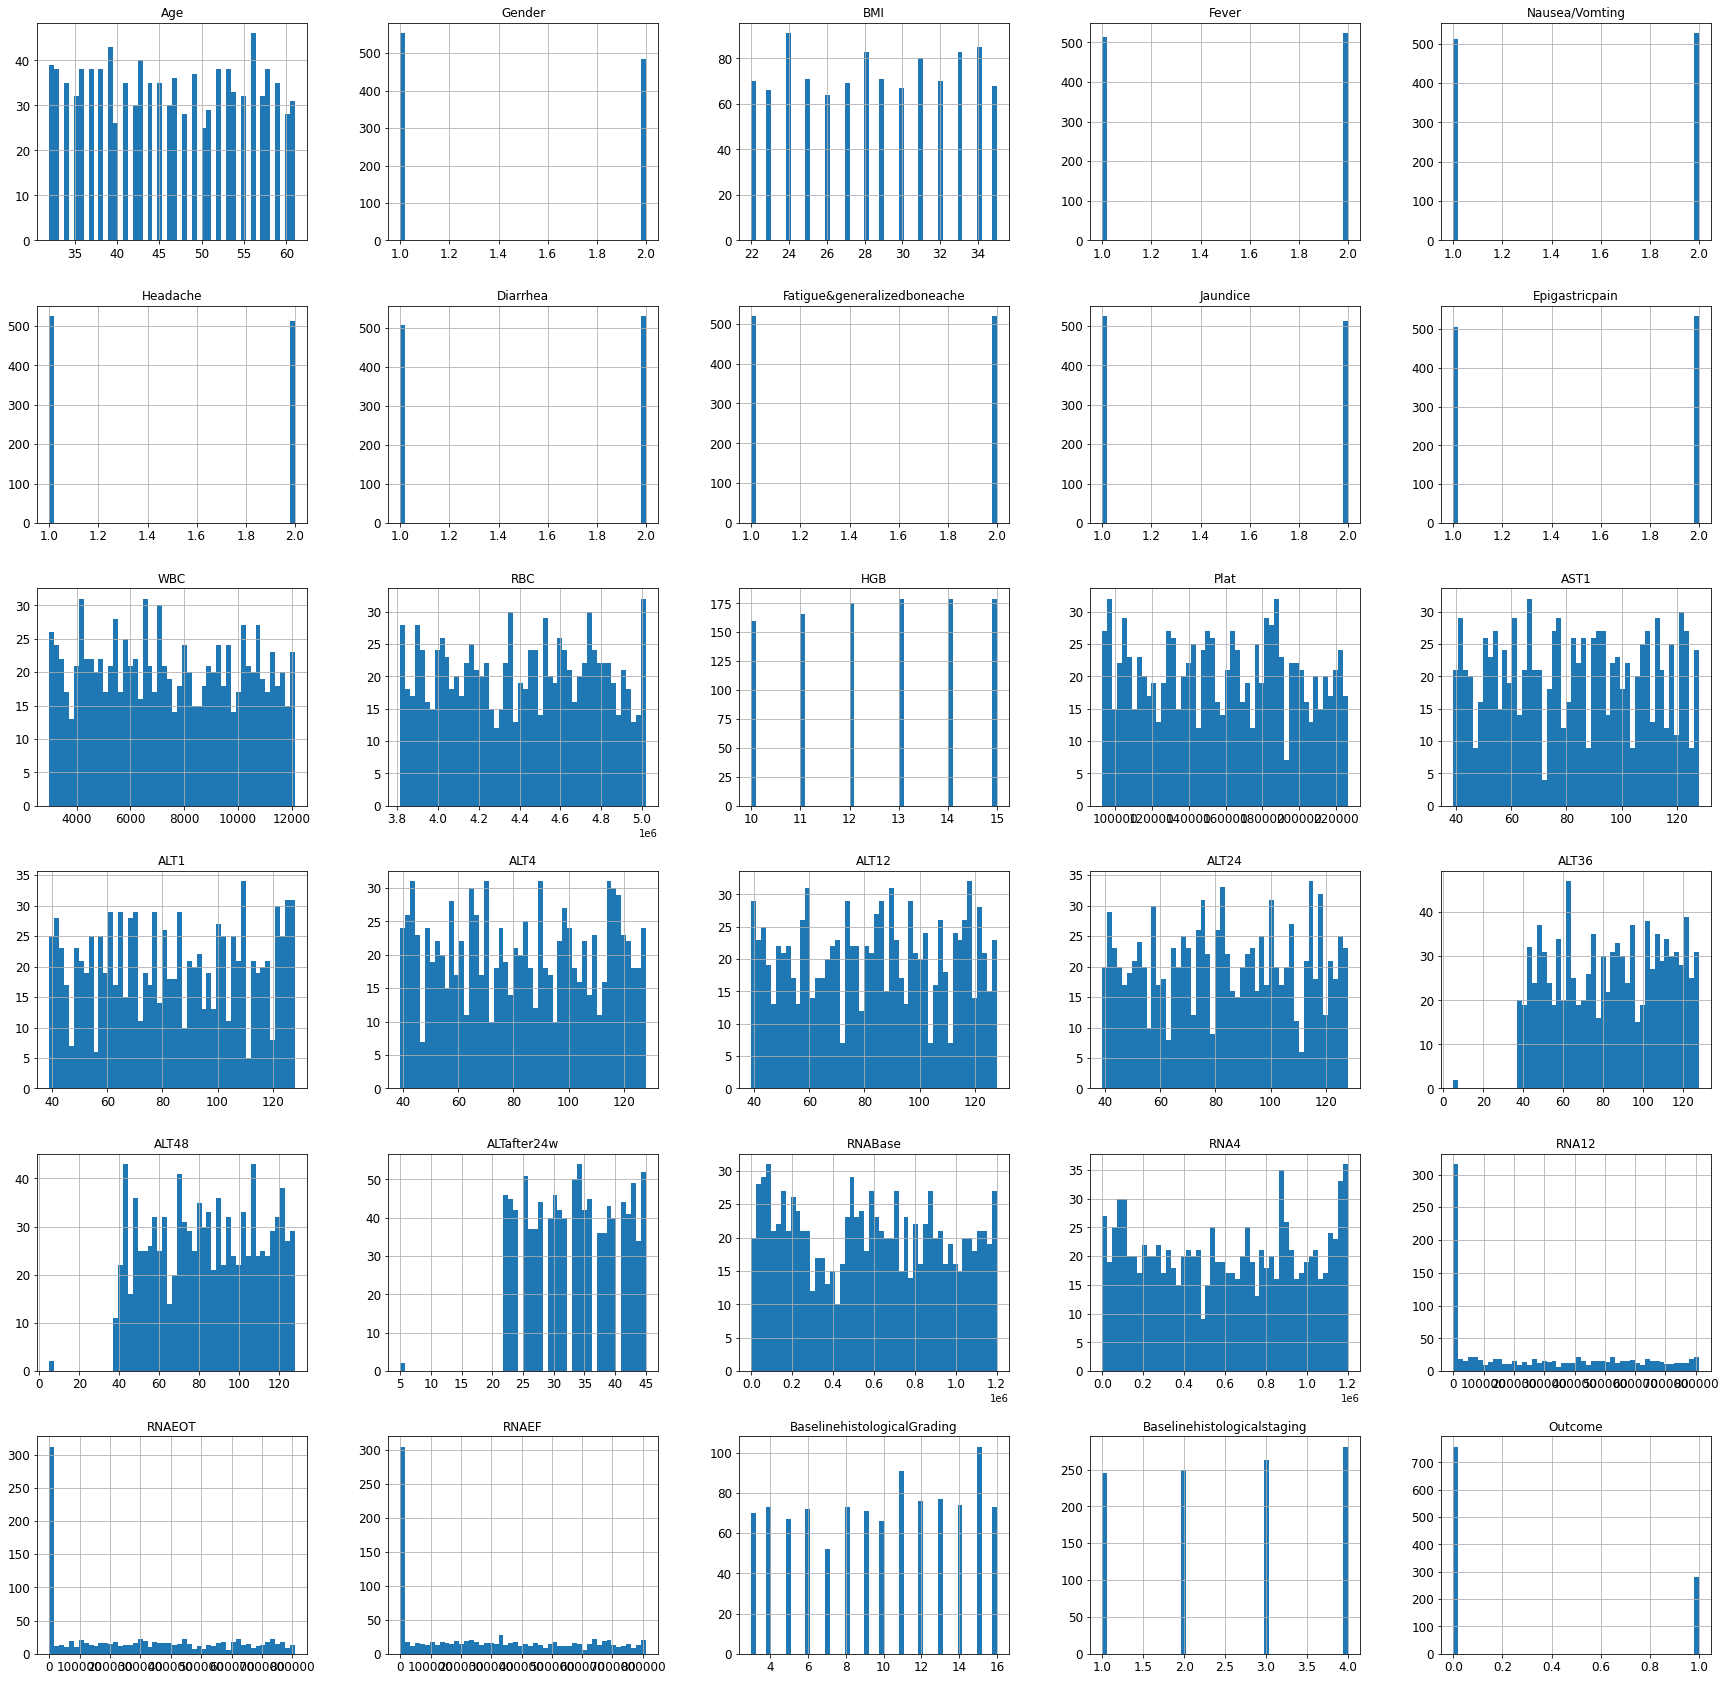

In [21]:
# Histogram for the training set
X_train.hist(figsize=(30, 30), bins=50, xlabelsize=12, ylabelsize=12);

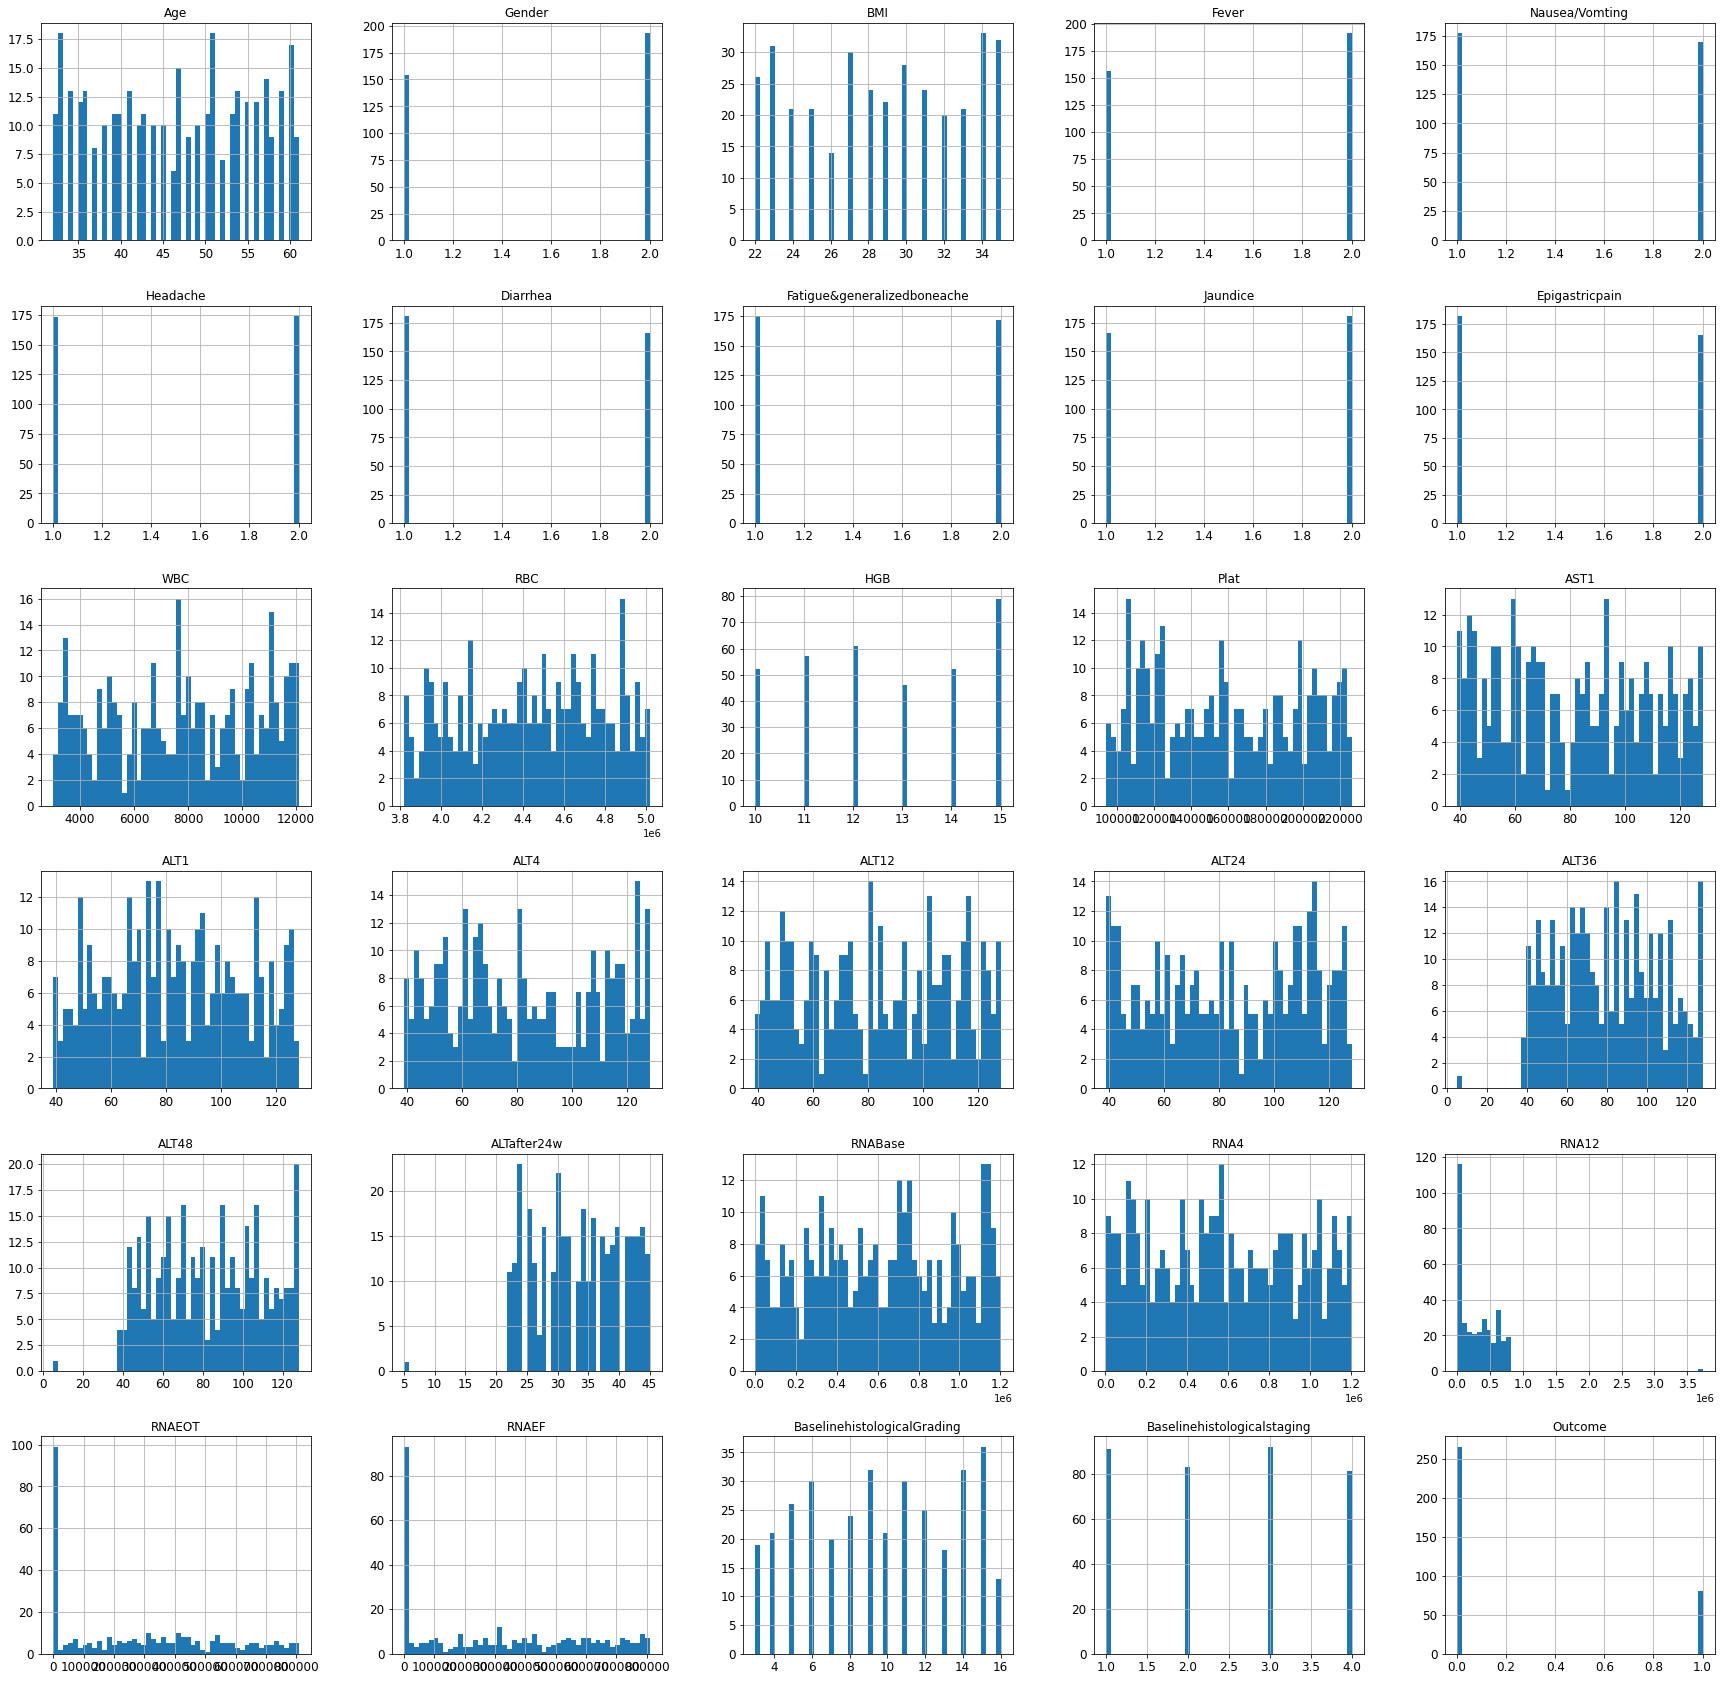

In [22]:
# Histogram for the test set
X_test.hist(figsize=(30, 30), bins=50, xlabelsize=12, ylabelsize=12);

In the histogram below, we can see how the training, as well as the test sets are well distributed in what concerns about the number of samples in each Histological Staging ('PortalFibrosis', 'FewSepta', 'ManySepta', 'Cirrhosis').

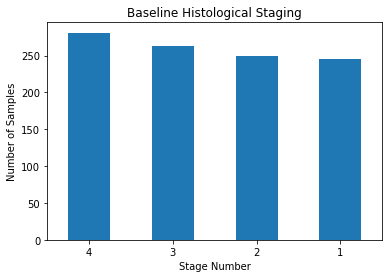

In [23]:
# Histogram for the training set
X_train['Baselinehistologicalstaging'].value_counts().plot.bar(title='Baseline Histological Staging',
                                                               xlabel = 'Stage Number', ylabel = 'Number of Samples', rot=0);

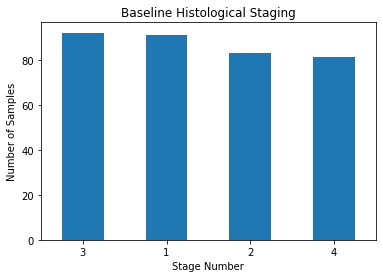

In [24]:
# Histogram for the test set
X_test['Baselinehistologicalstaging'].value_counts().plot.bar(title='Baseline Histological Staging',
                                                               xlabel = 'Stage Number', ylabel = 'Number of Samples', rot=0);

It can be seen in the database that the most prevalent Grade is 15 (for the training set) and 14 (for the test set). Moreover, as we know that these grades can take values ranging between 1 and 16 and since the mean in both sets is almost 2 units higher than 8, it can be stated that there is a slightly majority of samples having higher grades, therefore, a slightly worse condition, in both the training and the test sets.

The mean of the grades (in the training set) is:  9.806358381502891


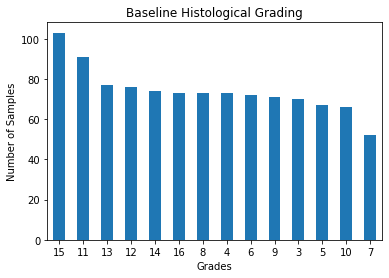

In [25]:
# Histogram for the training set
X_train['BaselinehistologicalGrading'].value_counts().plot.bar(title="Baseline Histological Grading", 
                                                            xlabel = 'Grades', ylabel = 'Number of Samples', rot=0);

print('The mean of the grades (in the training set) is: ', X_train['BaselinehistologicalGrading'].mean())

The mean of the grades (in the test set) is:  9.628242074927954


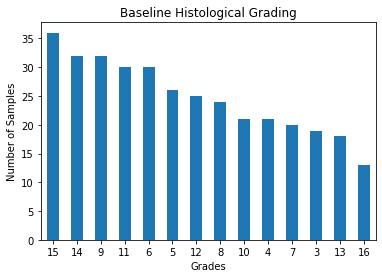

In [26]:
# Histogram for the test set
X_test['BaselinehistologicalGrading'].value_counts().plot.bar(title="Baseline Histological Grading", 
                                                            xlabel = 'Grades', ylabel = 'Number of Samples', rot=0);

print('The mean of the grades (in the test set) is: ', X_test['BaselinehistologicalGrading'].mean())

It can also be easily seen that there are unbalanced clases in the *'Outcome'* variable for both sets. 
It is problematic in the training set because the algorithm would mostly learn how to classify patients without Cirrhosis rather than detecting those who has the condition. Thus, this error would be fixed in future steps.

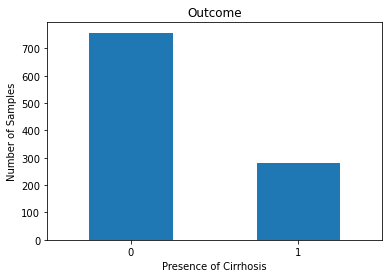

In [27]:
# Histogram for the training set
X_train['Outcome'].value_counts().plot.bar(title="Outcome", xlabel = 'Presence of Cirrhosis', ylabel = 'Number of Samples',
                                             rot=0);

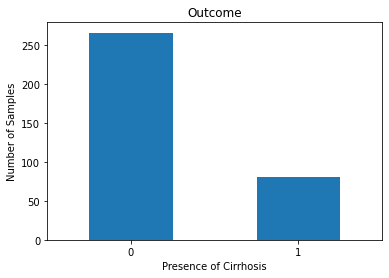

In [28]:
# histogram for the test set
X_test['Outcome'].value_counts().plot.bar(title="Outcome", xlabel = 'Presence of Cirrhosis', ylabel = 'Number of Samples',
                                       rot=0);

#### b) Plotting Boxplots

Function that receives as parameters a dataframe (data) and the headers of its features (headers), and what it does is to properly print the histograms and boxplots for each variable. This function takes into consideration the cases when a categorical variable appears because these variables use a special method for boxplot visualization.

In [29]:
def print_boxplots_hist(headers, data):
    
    for header in headers:
        
        x = data[header]
        
        # Try-except block to avoid categorical variables to enter into the boxplot code.
        init_value = x[x.index.values.tolist()[0]] # To find the value of an available index inside the pandas Series 'x'.
        
        
        try:
            trial = float(init_value)
            plt.figure(figsize = (20,4))
            ax1 = plt.subplot(1,2,1)
            ax1.hist(x, bins=70)
            ax1.set_title('Histogram for ' + header)

            ax2 = plt.subplot(1,2,2)
            ax2.boxplot(x)
            ax2.set_title('Boxplot for '+ header)
            plt.show()
        except:
            ax1 = plt.subplot(1,1,1)
            ax1.hist(x, bins=70)
            ax1.set_title('Histogram for ' + header)
            sns.catplot(x='Histologicalstaging', y="BaselinehistologicalGrading", kind="box", data=data, hue = 'Outcome')
            #set_title('Boxplot for '+ header)
            plt.show()

Applying the boxplots to print the histograms and boxplots.

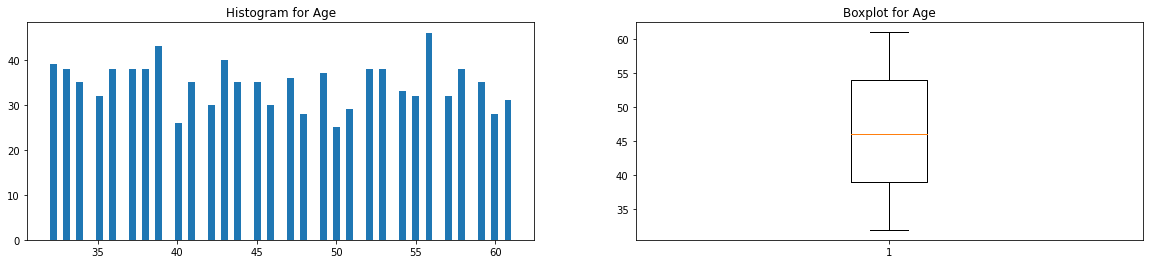

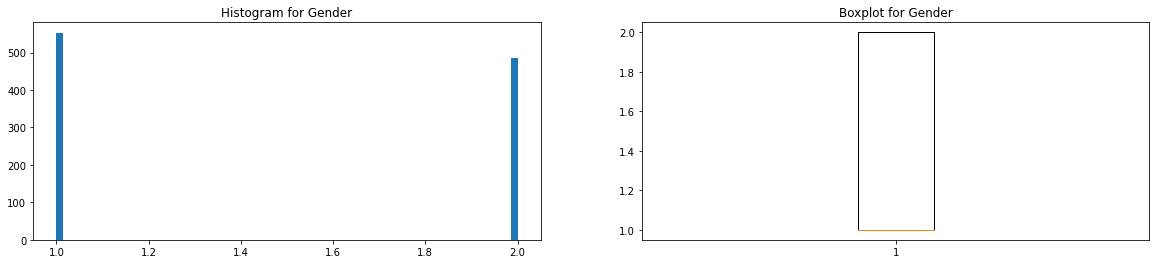

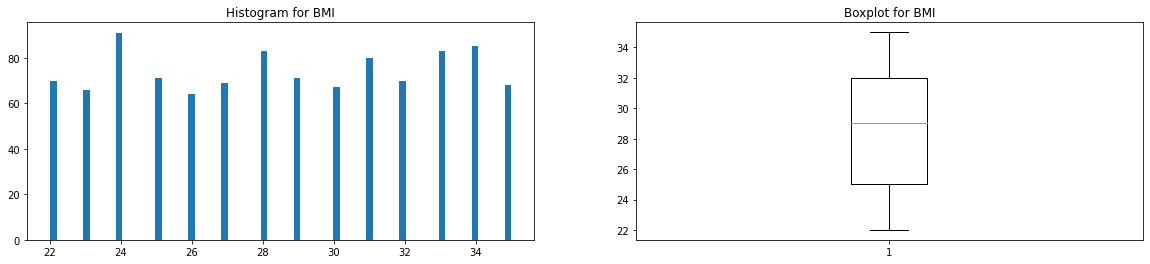

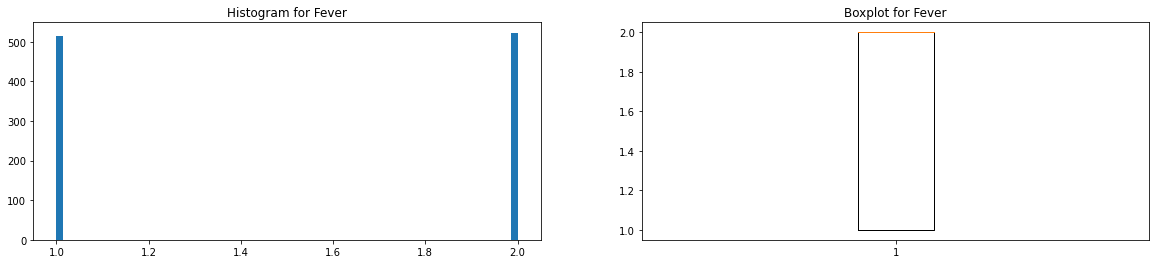

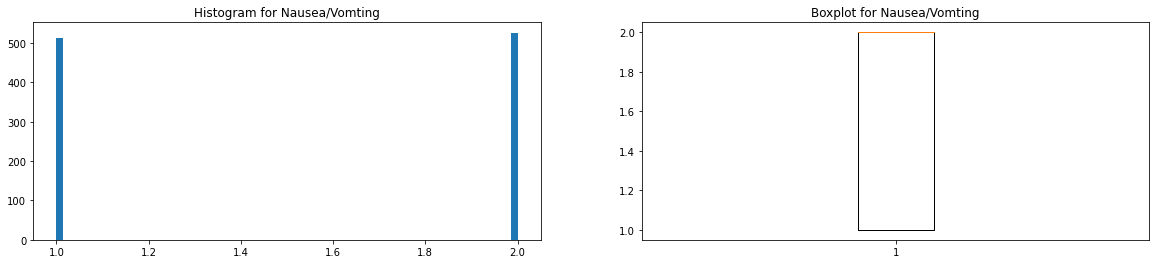

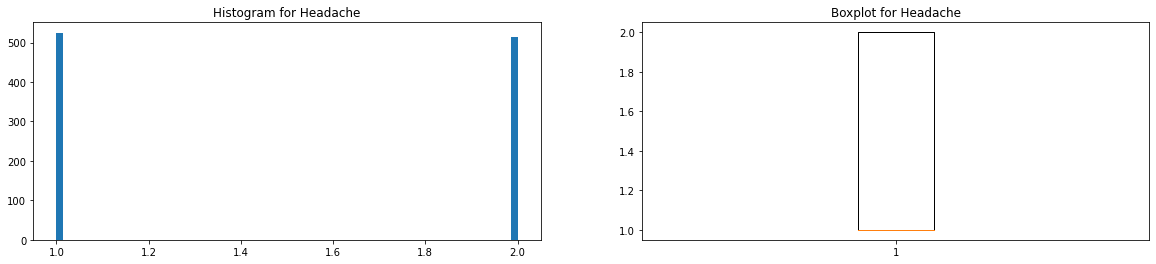

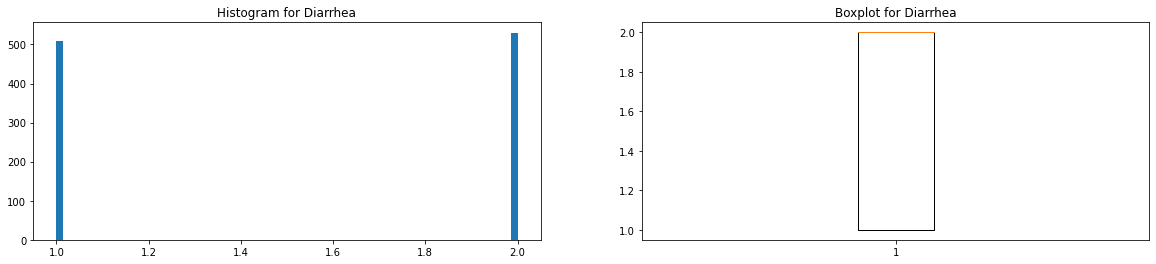

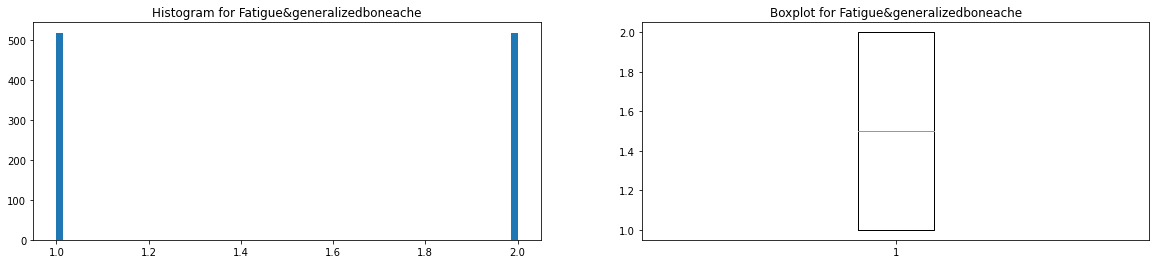

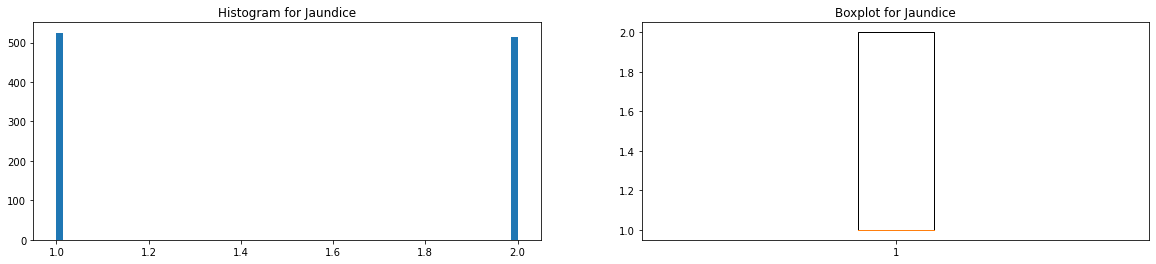

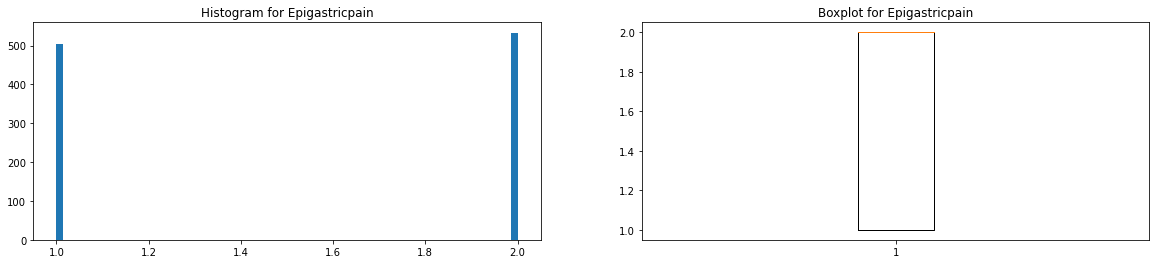

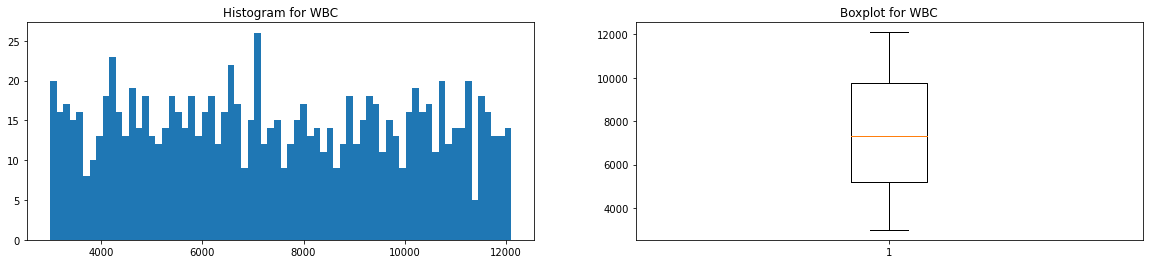

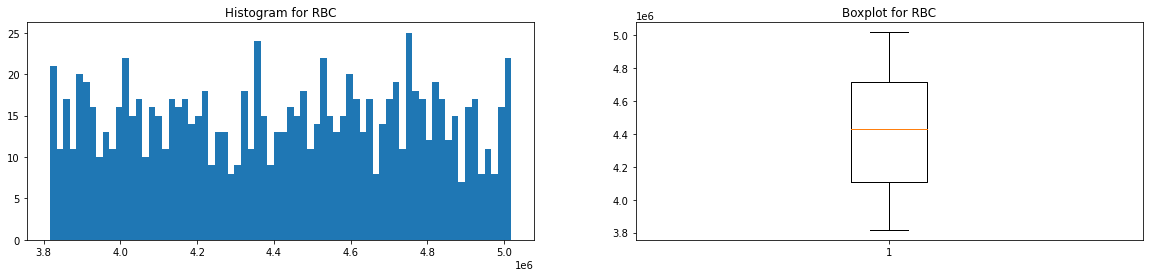

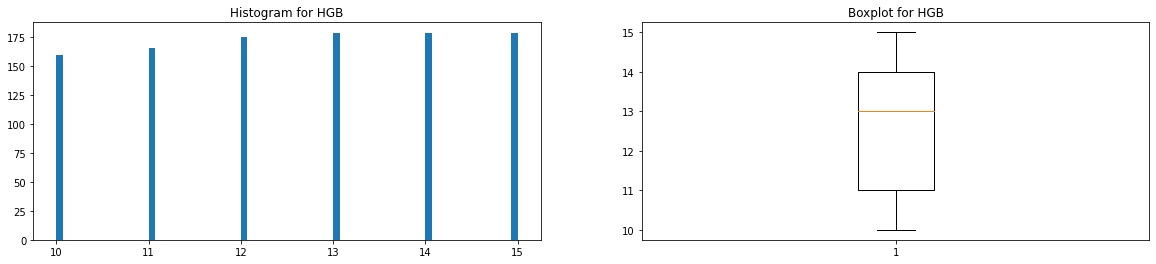

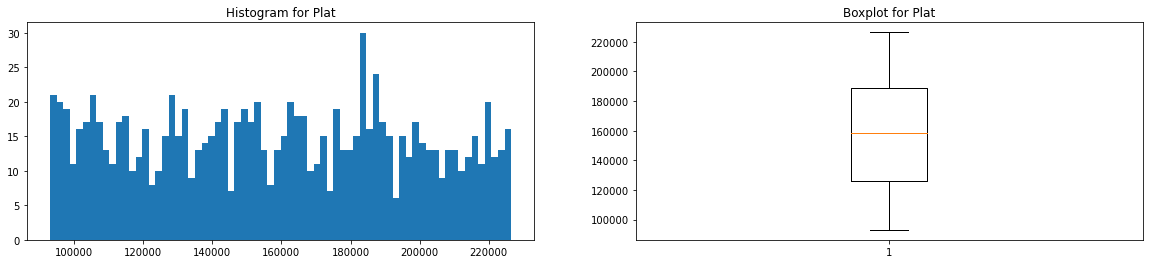

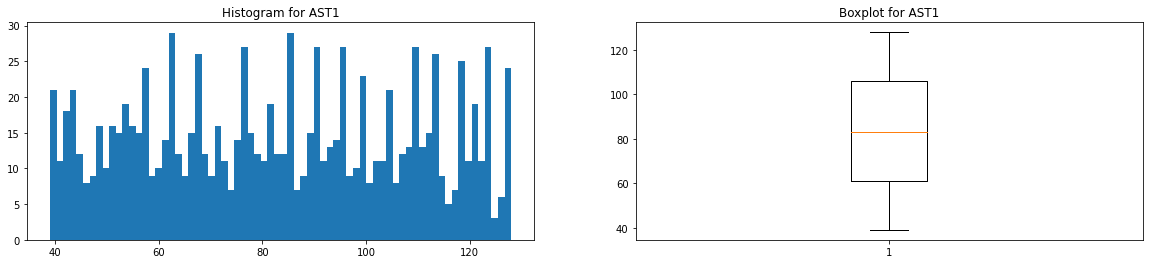

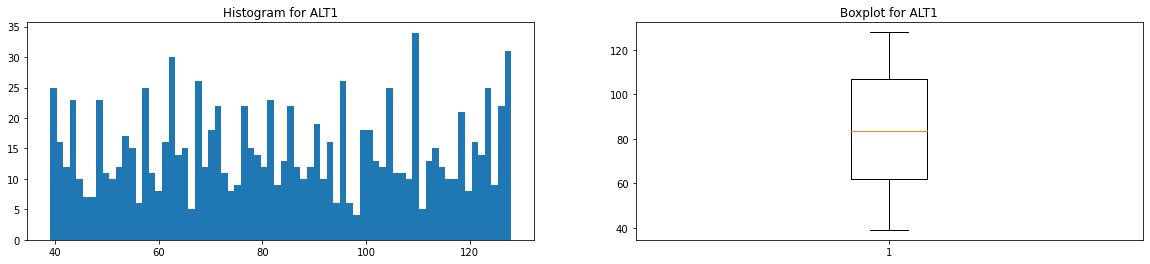

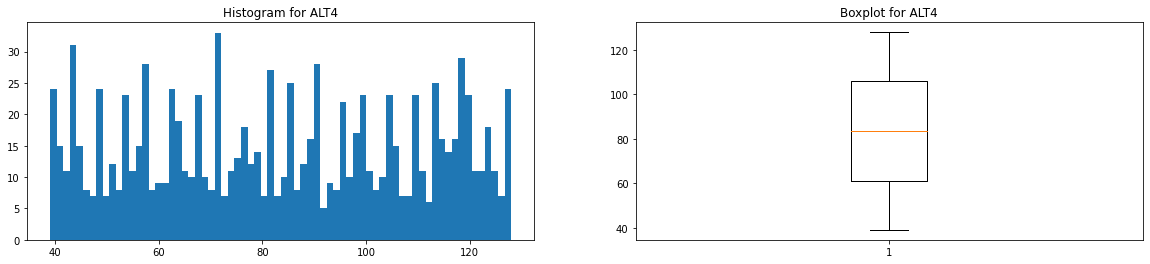

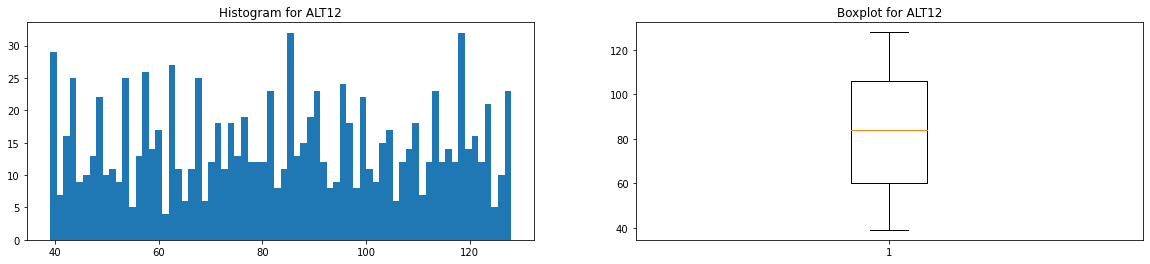

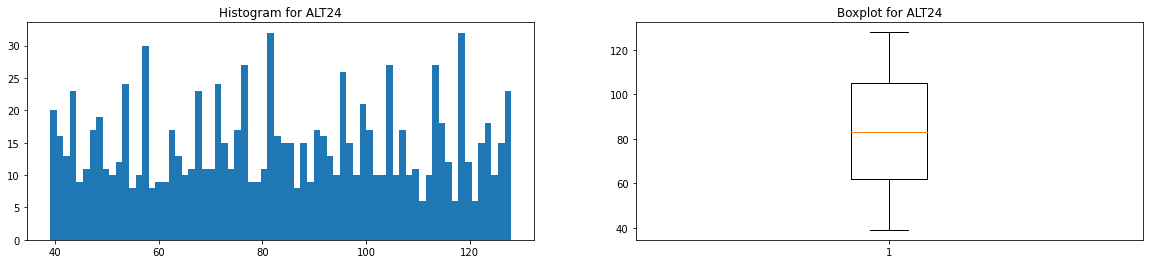

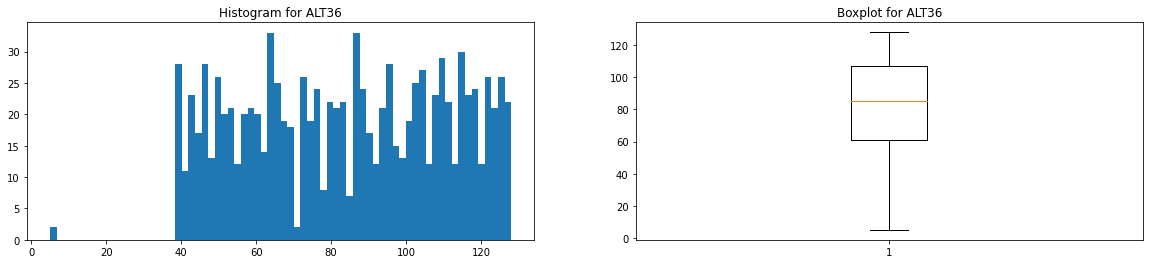

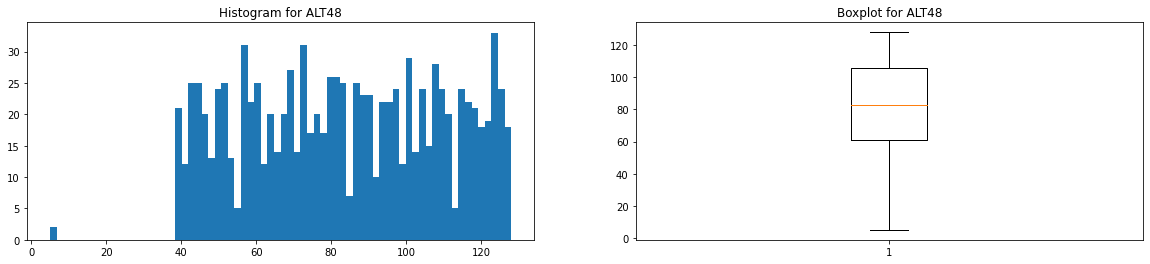

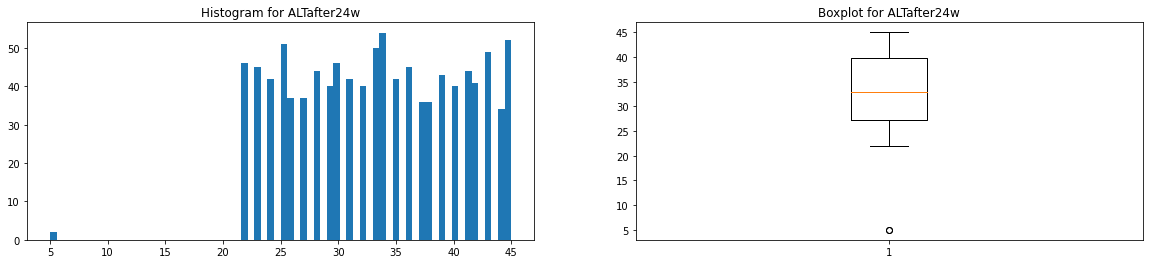

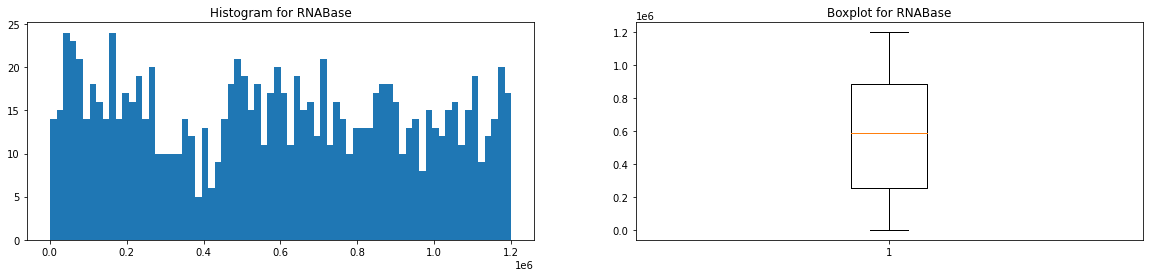

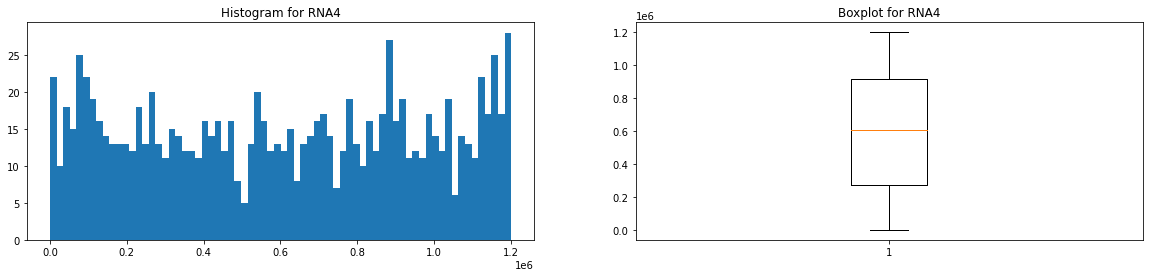

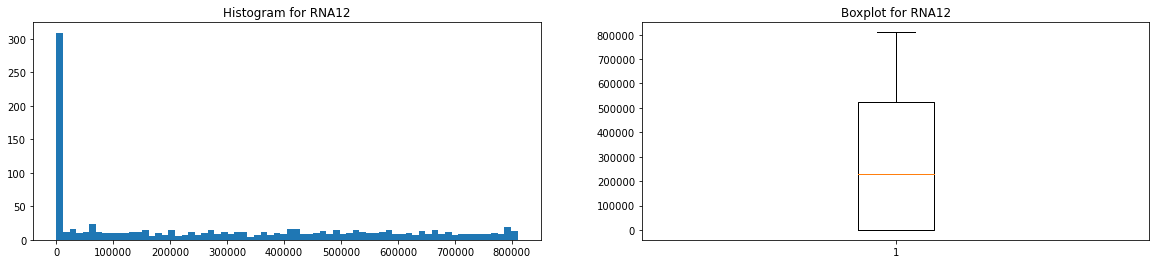

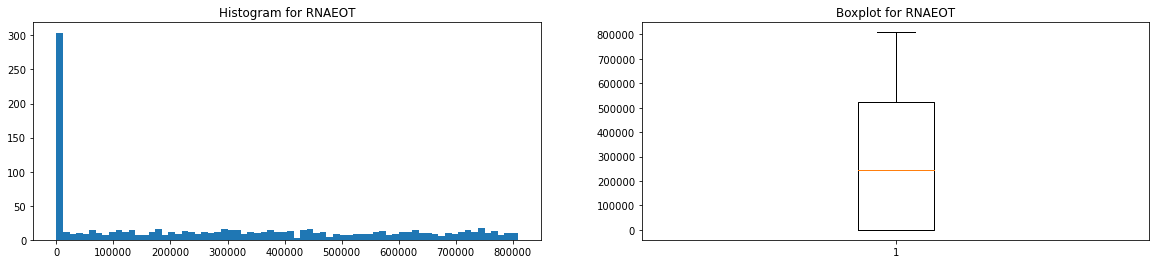

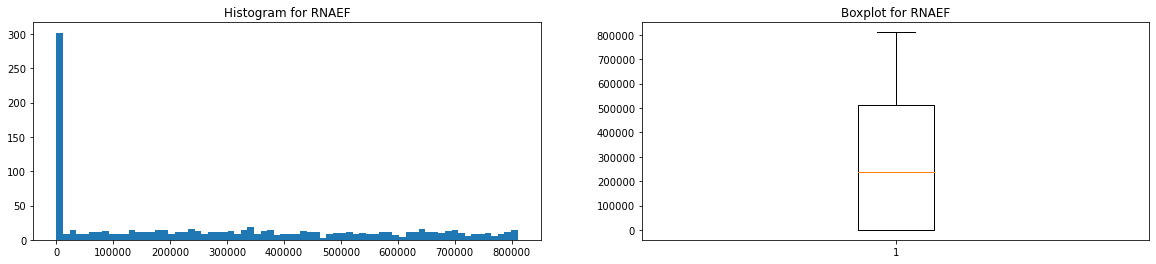

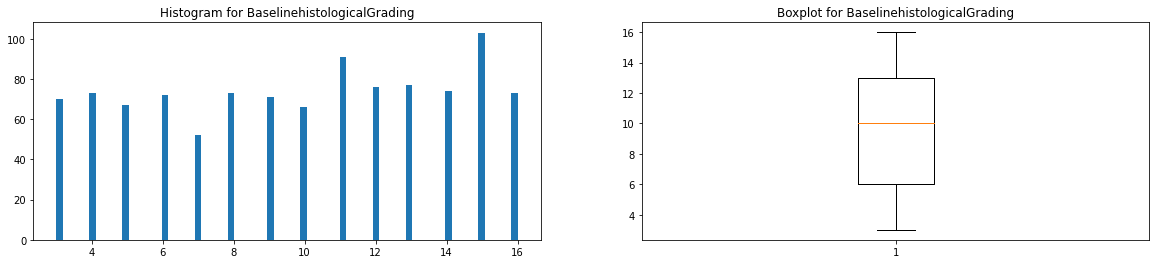

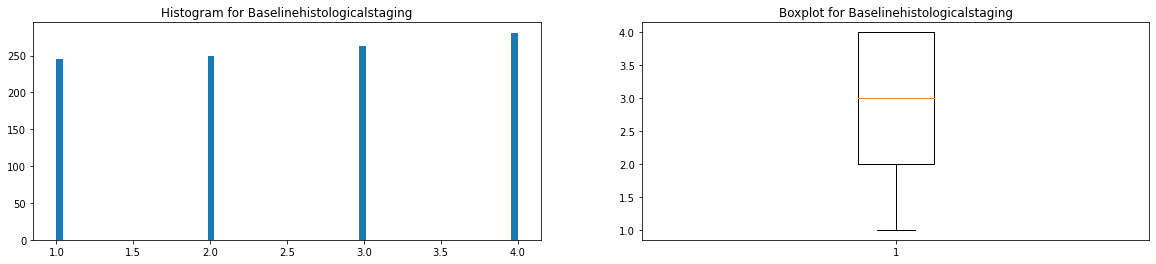

In [30]:
# Individualized histograms and boxplots for the training set.
print_boxplots_hist(headers, X_train)

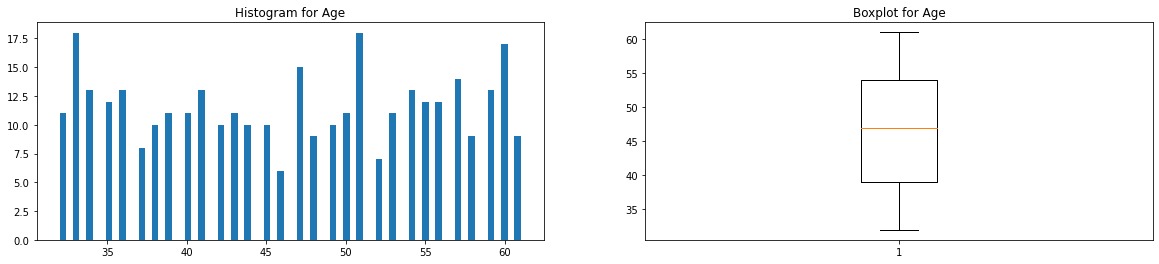

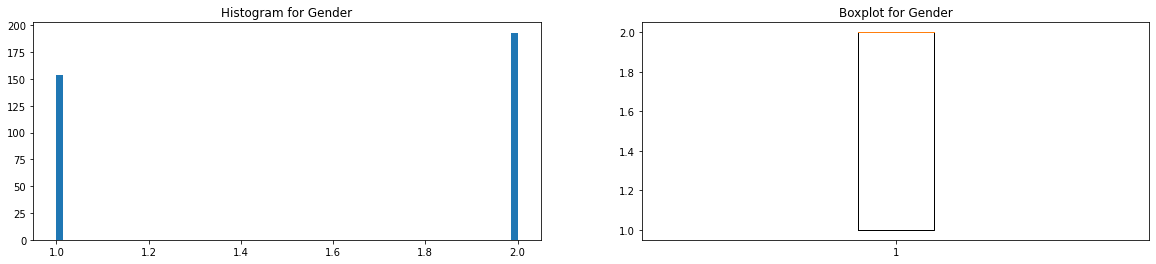

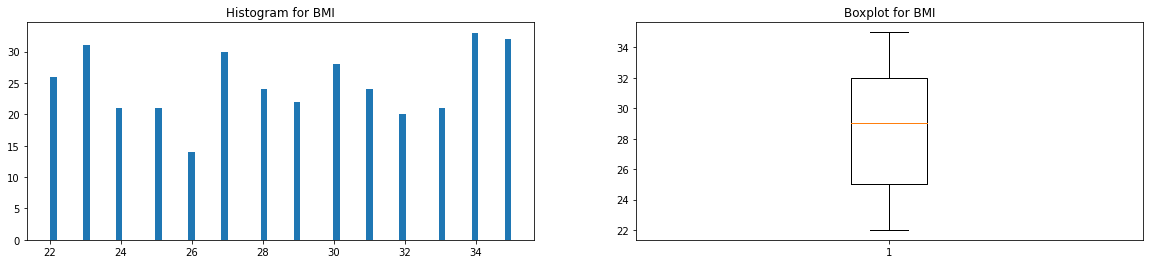

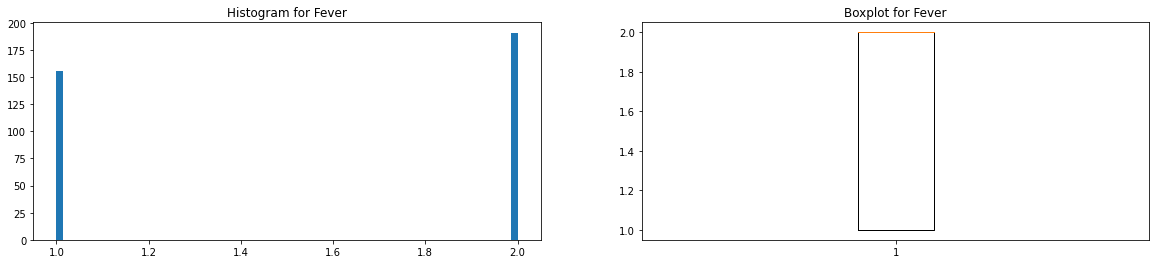

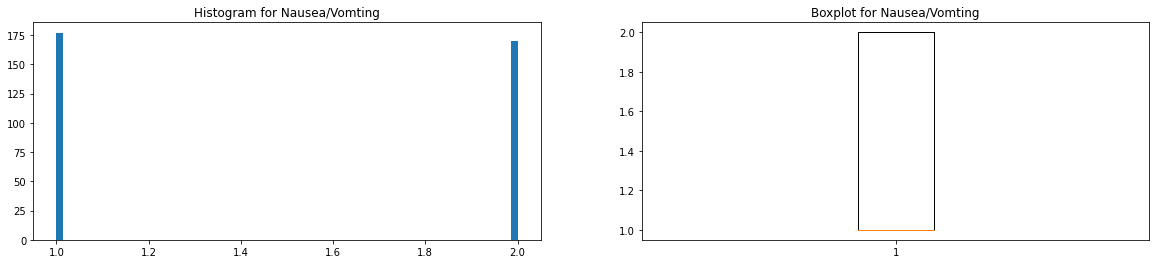

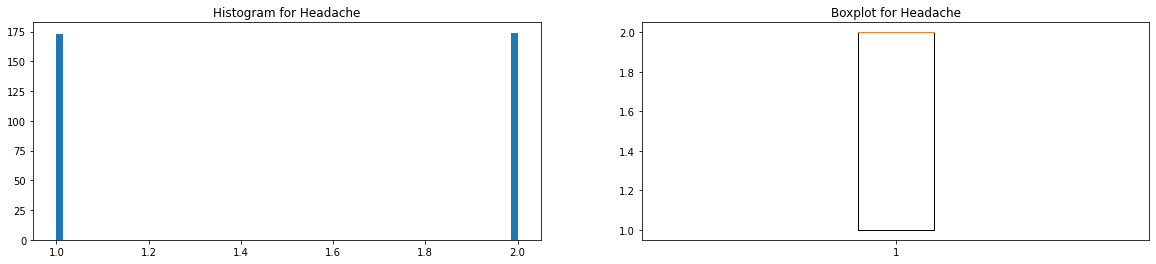

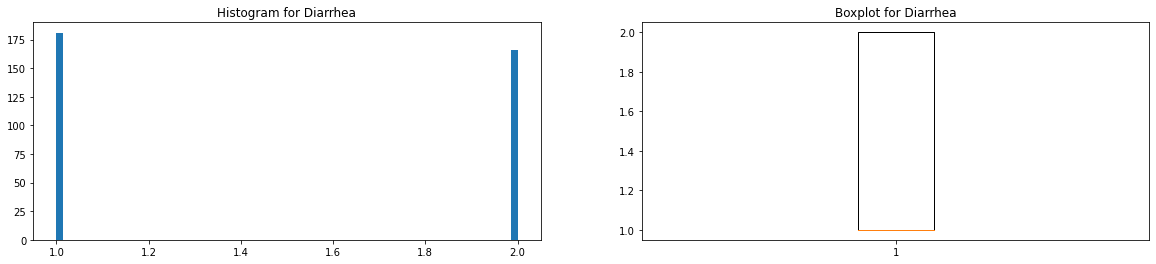

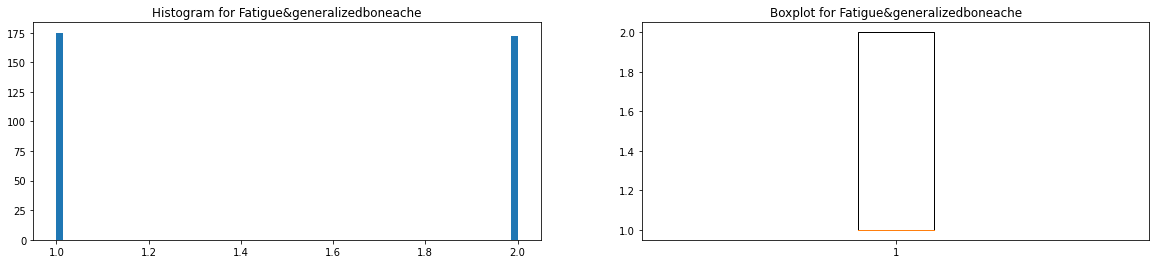

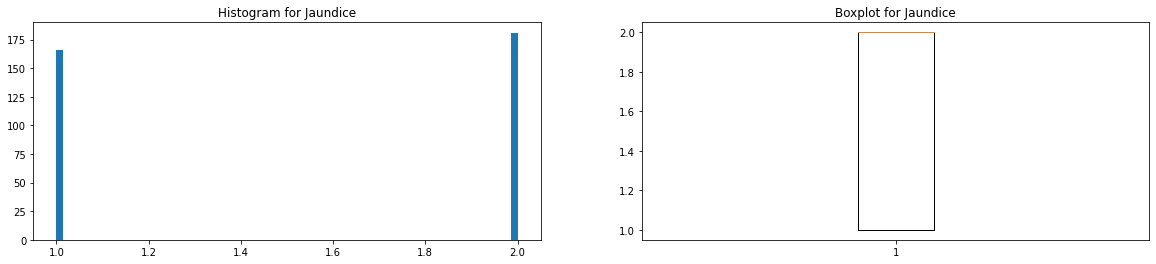

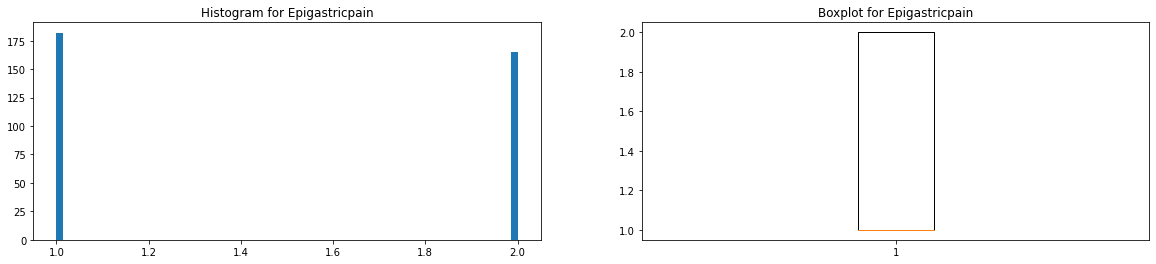

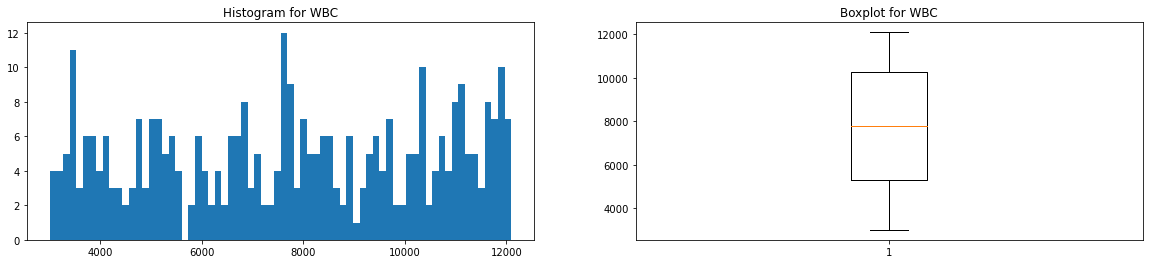

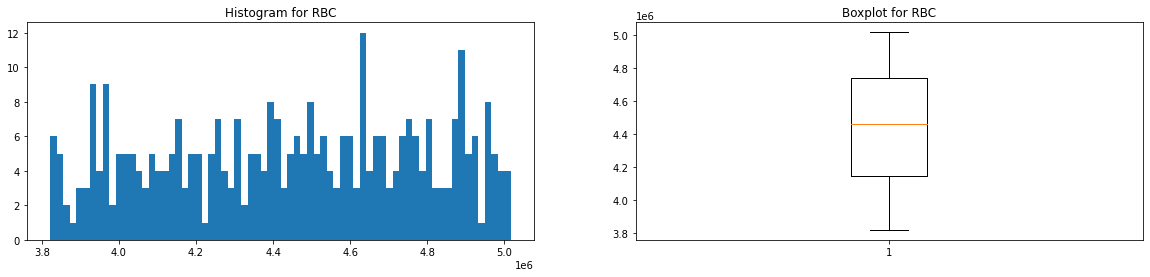

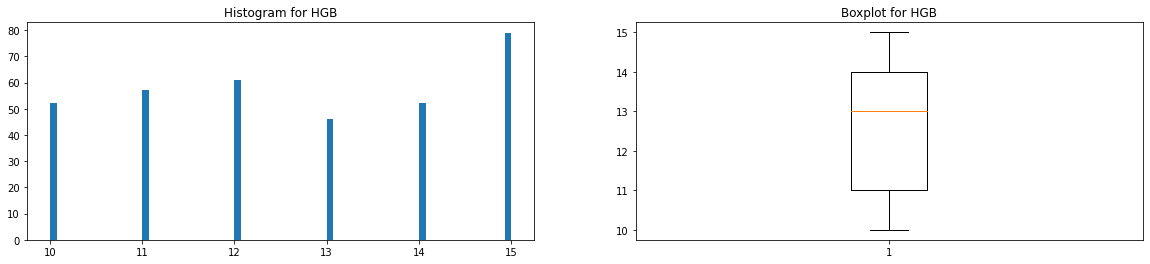

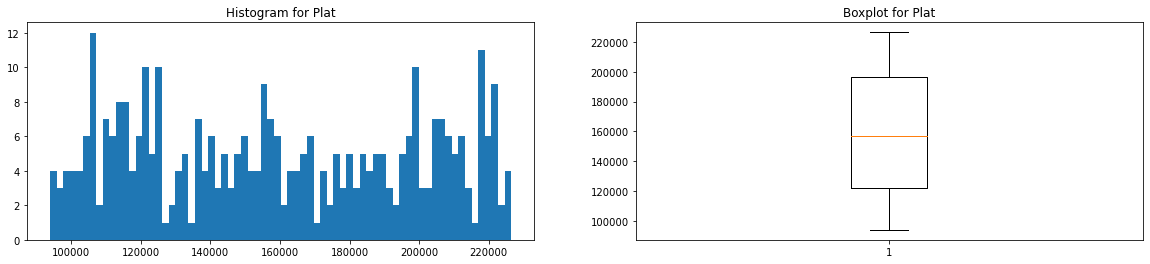

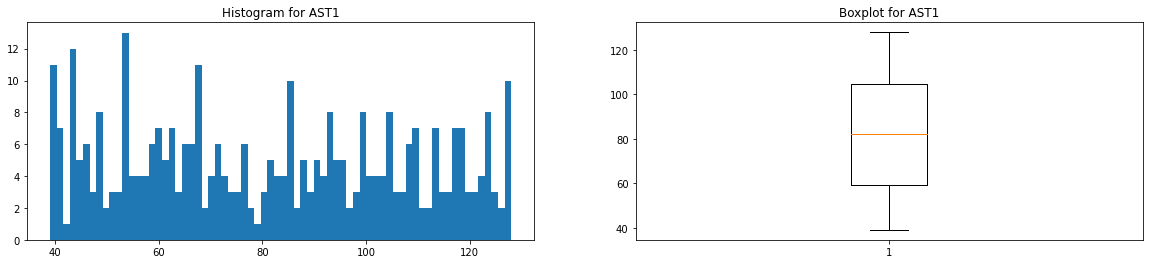

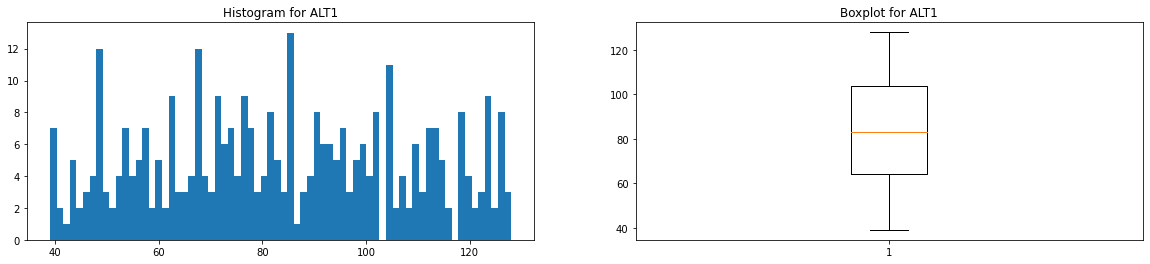

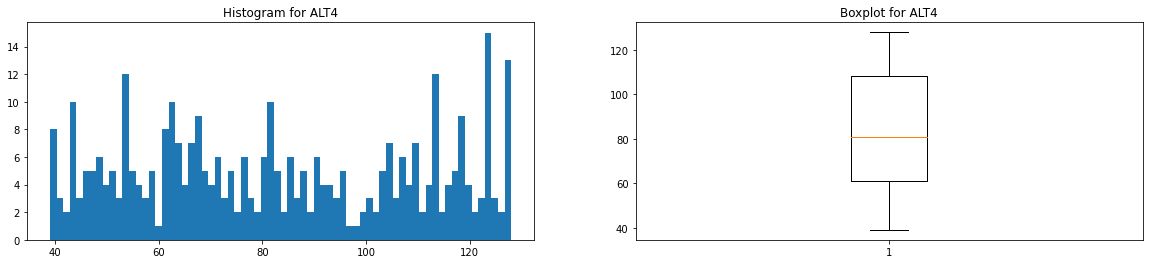

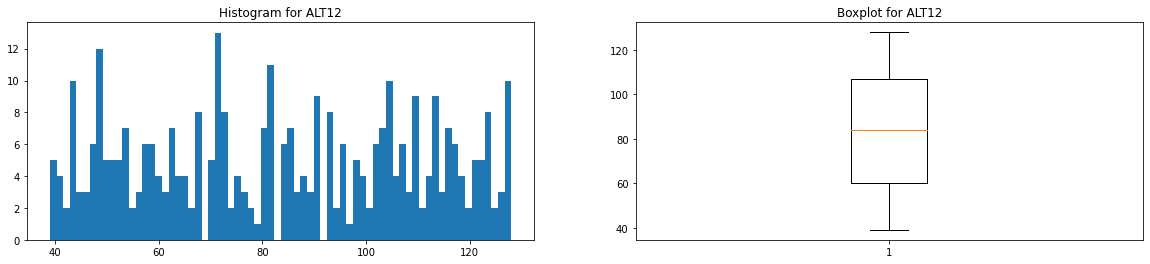

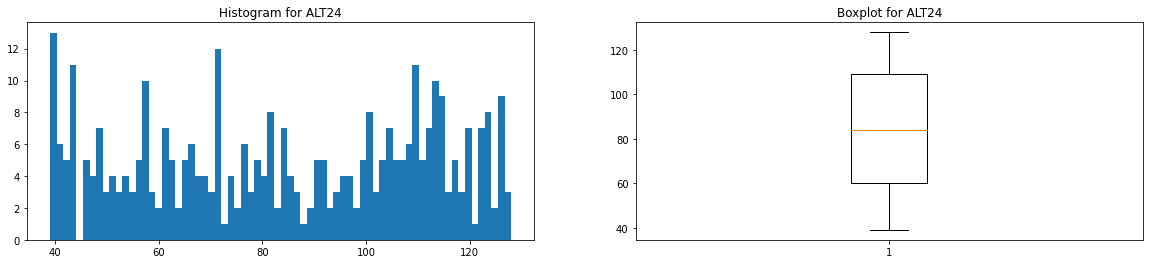

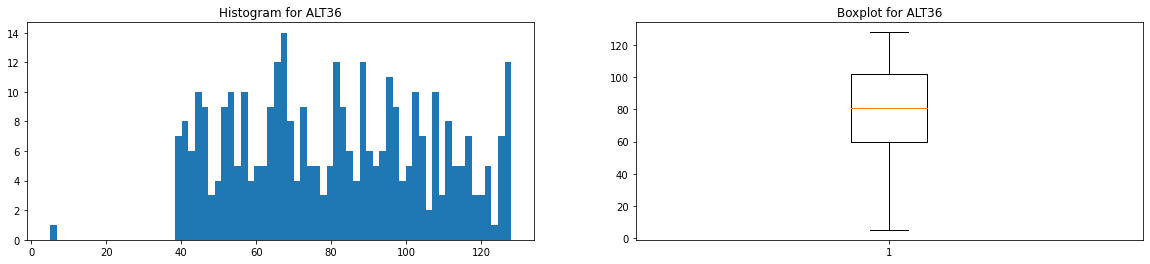

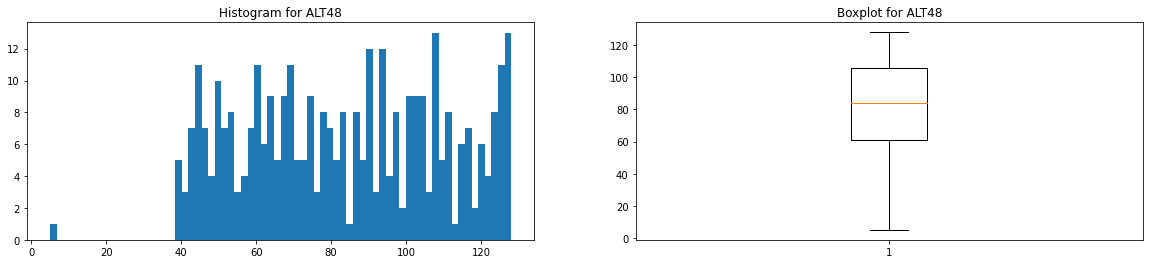

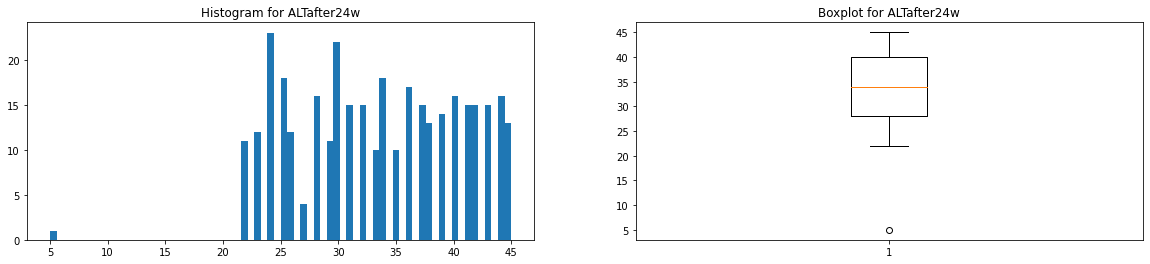

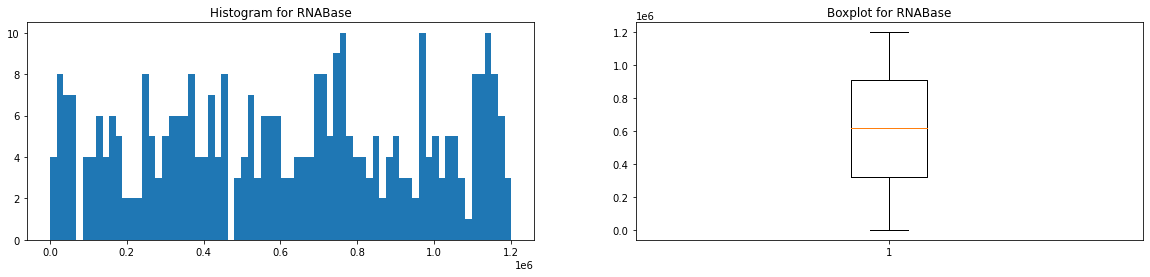

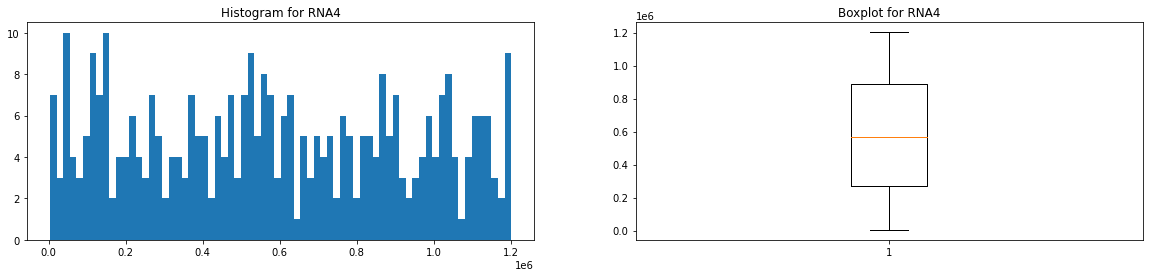

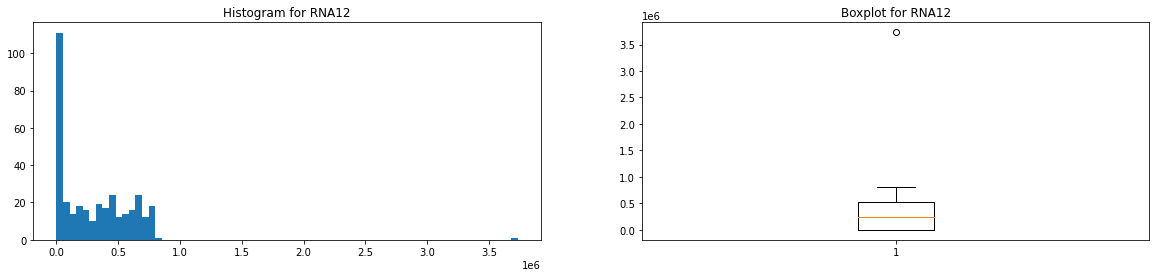

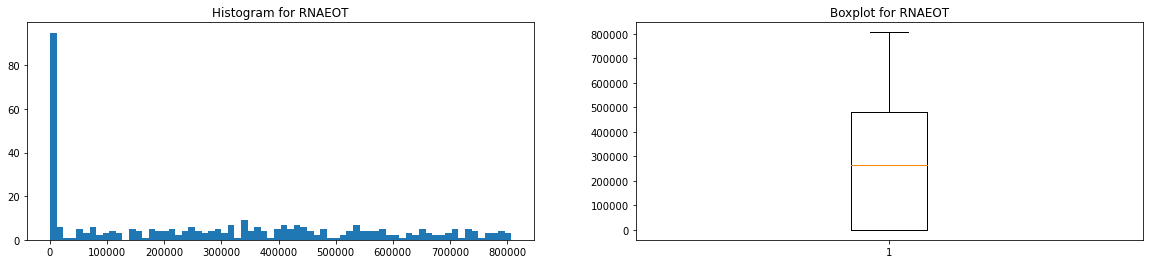

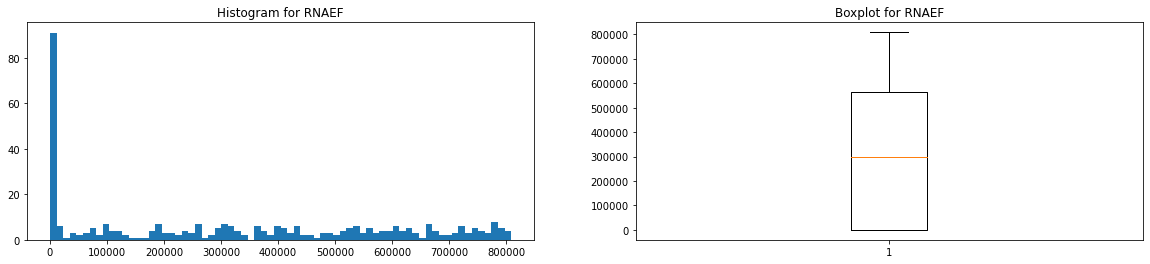

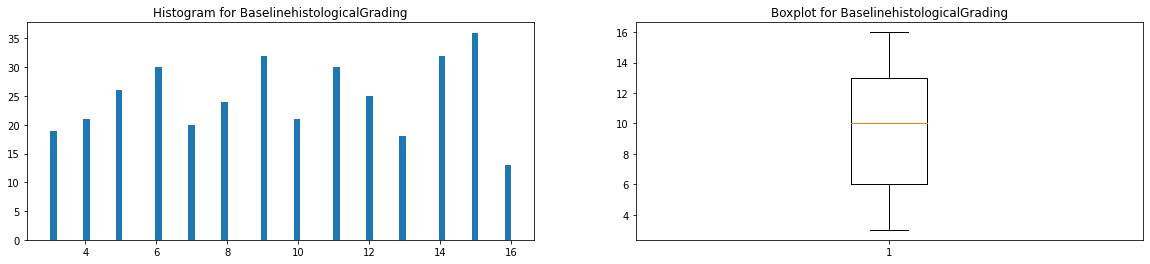

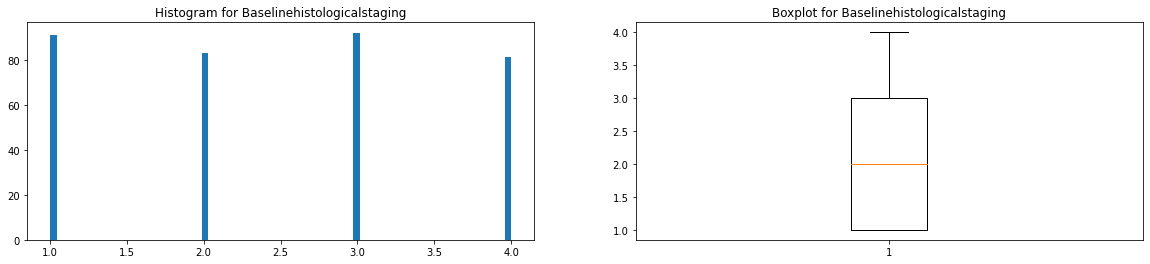

In [31]:
# Individualized histograms and boxplots for the test set.
print_boxplots_hist(headers, X_test)

#### c) Plot scatter plots

Since we have plenty of features available in both sets, the plotting of the scatterplot would be carried out right after observing the correlation between features. In this sense, it became easier to select variables that are worthy to visualize in this kind of plots.

## 6.- Correlation

The correlation between different features will allow to gain a better perspective of which variables are more related between themselves and could help us to carry out some future analysis. However, the only set used will be the training one, since the test one contains sample that should be still *'unknown'* and thus the relationship between the features of these samples cannot be studied if the samples are not available yet.

#### Plotting the dispersion matrix

<AxesSubplot:>

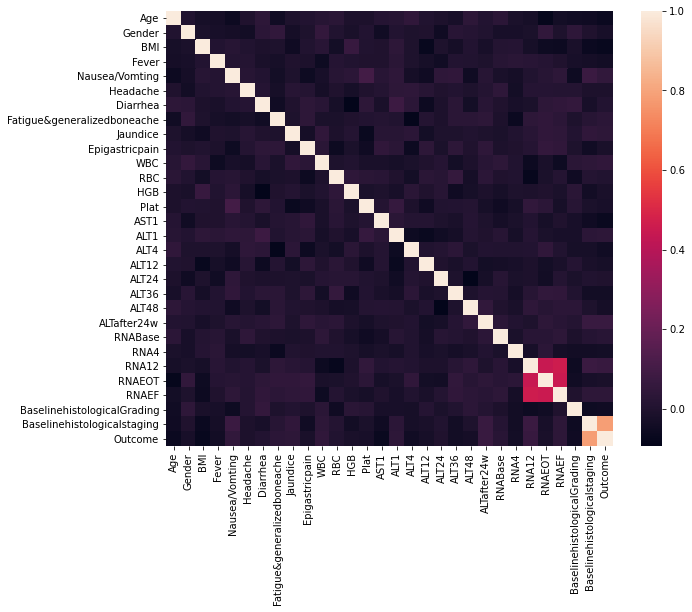

In [32]:
#data = pd.read_csv("HCV-Egy-Data.csv") #We can change this database
f, ax = plt.subplots(figsize=(10, 8))
corr = X_train.corr()
# ammot = False, to make the plot more simple and understandable.
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

#### Pearson coefficient (for continuous variables).

In [33]:
X_train.corr()

,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue&generalizedboneache,Jaundice,Epigastricpain,...,ALT48,ALTafter24w,RNABase,RNA4,RNA12,RNAEOT,RNAEF,BaselinehistologicalGrading,Baselinehistologicalstaging,Outcome
Age,1.000000e+00,0.000882,-0.027518,-0.033236,-0.056372,-6.382932e-07,0.035508,-0.042952,-0.004197,0.006850,...,0.037922,0.006941,0.034669,-0.014433,-0.026579,-0.077194,-0.034748,-0.043375,-0.048664,-0.060663
Gender,8.816158e-04,1.000000,-0.014975,-0.020735,-0.030012,-4.131127e-02,0.032294,0.048273,-0.029725,-0.004023,...,0.014768,0.001190,-0.024351,-0.022736,-0.013942,0.051424,-0.007529,0.040336,-0.000003,-0.023014
BMI,-2.751809e-02,-0.014975,1.000000,0.006535,0.021948,5.006538e-03,-0.009260,-0.005732,-0.046589,0.002810,...,0.006886,-0.020822,0.011051,0.015184,-0.027656,-0.054381,-0.056225,-0.017124,-0.060298,-0.070941
Fever,-3.323618e-02,-0.020735,0.006535,1.000000,0.011458,1.357789e-02,-0.019436,-0.028903,-0.001838,-0.009846,...,0.000832,-0.004123,0.021827,0.029981,0.025961,0.016850,-0.002975,-0.024044,-0.033018,-0.041556
Nausea/Vomting,-5.637243e-02,-0.030012,0.021948,0.011458,1.000000,1.942681e-02,0.009351,-0.034685,-0.003698,-0.054338,...,-0.049058,0.019800,-0.020388,-0.030603,0.001220,0.020566,0.037256,-0.053635,0.073968,0.050328
Headache,-6.382932e-07,-0.041311,0.005007,0.013578,0.019427,1.000000e+00,0.015664,-0.028904,0.021064,0.009950,...,-0.005080,0.011977,0.040780,-0.036052,0.014033,0.015730,0.011260,0.009641,-0.009694,-0.008134
Diarrhea,3.550832e-02,0.032294,-0.009260,-0.019436,0.009351,1.566385e-02,1.000000,-0.042399,0.000245,0.037986,...,-0.034450,0.023447,-0.003289,-0.022287,-0.013364,0.035222,0.045788,0.055294,-0.020854,0.006602
Fatigue&generalizedboneache,-4.295234e-02,0.048273,-0.005732,-0.028903,-0.034685,-2.890367e-02,-0.042399,1.000000,-0.005781,0.036622,...,0.028073,0.038835,-0.008450,-0.059756,0.036597,0.044953,0.033561,-0.007347,0.020598,0.032523
Jaundice,-4.196778e-03,-0.029725,-0.046589,-0.001838,-0.003698,2.106377e-02,0.000245,-0.005781,1.000000,-0.032457,...,0.004278,-0.003558,-0.014689,0.003633,0.024486,0.043747,0.039938,0.005849,0.045237,0.035232
Epigastricpain,6.849857e-03,-0.004023,0.002810,-0.009846,-0.054338,9.950046e-03,0.037986,0.036622,-0.032457,1.000000,...,-0.002320,0.040020,-0.011464,-0.000346,0.016926,0.054779,0.046137,-0.004642,-0.046058,-0.018610


##### Conclusion: 
    Now that the variables "RNA12", "RNAEOT" and "RNAEF" have shown to have a strong relationship between themselves, it is time to do some plotting to check what conclusions can be drawn.

    On the other hand, the variables 'Baselinehistologicalstaging' and 'Outcome' have an even stronger relationship, but this is only the result of creating the variable 'Outcome' from 'Baselinehistologicalstaging'.

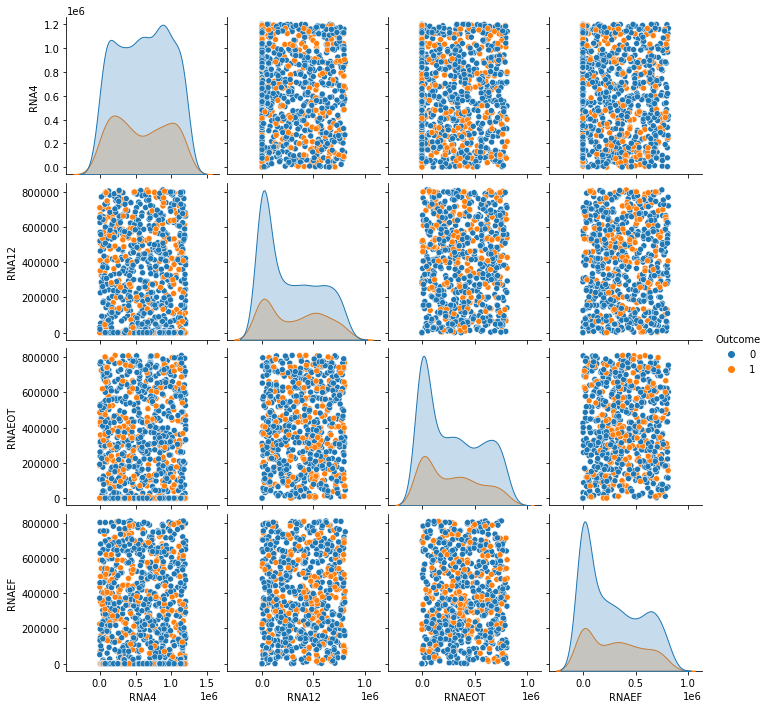

In [34]:
sns.pairplot(X_train, x_vars=["RNA4", "RNA12", "RNAEOT", "RNAEF"],
    y_vars=["RNA4", "RNA12", "RNAEOT", "RNAEF"], hue="Outcome");

##### Conclusion: 
        The value of the viral RNA tends to always be higher in patients that do not suffer from Cirrhosis yet than in those with the condition. This result makes sense because Cirrhosis is a condition commonly developed after many years of bearing HCV, not immediately after the infection (the blue color contains those patients that have already developed some liver complications but who are not yet reached the Cirrhotic stage). 

#### Chi-square (for categorical variables).

As we can see below we have a categorical variable in a pandas Series but it is necessary to create a '[contingency table](https://courses.lumenlearning.com/odessa-introstats1-1/chapter/contingency-tables/)' for applying the Chi-square test of independence of variables. However, it is important to highlight that this is a test for checking the independence of different categories of a population and that this test is only meaningful when the dimensions of the table is two or more. 

Applying the test to a one-dimensional table will always result in expected equal to observed and a chi-square statistic equal to 0. Therefore, we need to first create a contingency table and then look for another method to answer the question below.

We wanted to address the question:
##### Is it equally likely to have the same distribution in every type of stage (without considering the No Cirrhosis status)?

In [35]:
# Type of the variable 'Histologicalstaging'
type(X_train.Histologicalstaging)

pandas.core.series.Series

In [36]:
# Representing the number of samples in each category.
categ_count = X_train['Histologicalstaging'].value_counts()
print(X_train['Histologicalstaging'].value_counts()) 

#The array below contains the number of samples affected by each one of the Cirrhosis stages (exception made for 'NoFibrosis').
obs = np.array([int(categ_count[0]), int(categ_count[1]), int(categ_count[2]), int(categ_count[3])])
print('The observation array: ', obs)

Cirrhosis         281
ManySepta         263
FewSepta          249
PortalFibrosis    245
NoFibrosis          0
Name: Histologicalstaging, dtype: int64
The observation array:  [281 263 249 245]


Until now we have the categories of the different stages in an array that can be represented by the following table:

Stages  | Cirrhosis | ManySepta | PortalFibrosis |  FewSepta 
------------- | ------------- | ------------- | ------------- | -------------
Number of samples  | 281 | 263 | 249 | 245

Moreover, an extra row was added in our one-dimensional matrix containing the number of each type of Cirrhosis stage so that the previous array was converted into the one shown below. Since we want to check an equal distribution of the population in each stage, this new row would have the *expected number of samples* that the distribution would have if it was 'equally distributed'.

In [37]:
#Number of expected counts if the distribution is equal.
list_obs = obs.tolist()
expect_counts = sum(list_obs)/4
obs = np.vstack([obs, [expect_counts, expect_counts, expect_counts, expect_counts]])
print('New array: ', obs)

New array:  [[281.  263.  249.  245. ]
 [259.5 259.5 259.5 259.5]]


Now, the new array looks like has the same structure of the following table:

Stages  | Cirrhosis | ManySepta | PortalFibrosis |  FewSepta 
------------- | ------------- | ------------- | ------------- | -------------
Number of samples  | 281 | 263 | 249 | 245
Number of expected samples | 259.5 | 259.5 | 259.5 | 259.5 

Now, since we have a one-way table, applying the chi2_contingency method to make the Chi-square test of independence of variables in a contingency table, is not the approach to solve the question. Instead, the '[chisquare](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chisquare.html)' function would be employed. This function performs Chi-Square Goodness of Fit Test, the type of test suitable for one-way tables. Hence, what the chi-square test checks is the null hypothesis that this categorical data has the given frequencies.

In this case, the *null hypothesis* is that there is the same number of samples in each Cirrhosis stage and the *alternative hypothesis* is that there is not the same number of samples in each Cirrhosis stage.


In [38]:
chisq, pvalue = stats.chisquare(f_obs=obs[0], f_exp=obs[1])
print('The chi-squared test statistic is:', chisq, 'and the p value is:',pvalue)

The chi-squared test statistic is: 3.0635838150289016 and the p value is: 0.3819253193335037


Since the p value is much higher than 0.05, the null hypothesis failed to be rejected the null hypothesis which implies that indeed the number of samples in each category is more or less the same.

## 7.- Basics of Grouping

By implementing this grouping, we can find the most relevant features to work with.

In [39]:
X_train.groupby(['Outcome', 'Gender']).mean()

Age        BMI     Fever  Nausea/Vomting  Headache  \
Outcome Gender                                                             
0       1       46.439698  28.844221  1.542714        1.505025  1.510050   
        2       46.718663  28.654596  1.487465        1.476323  1.481894   
1       1       45.735484  28.103226  1.438710        1.561290  1.522581   
        2       44.944444  28.119048  1.507937        1.531746  1.444444   

                Diarrhea  Fatigue&generalizedboneache  Jaundice  \
Outcome Gender                                                    
0       1       1.494975                     1.477387  1.494975   
        2       1.523677                     1.504178  1.470752   
1       1       1.496774                     1.477419  1.541935   
        2       1.539683                     1.587302  1.500000   

                Epigastricpain          WBC  ...      ALT36      ALT48  \
Outcome Gender                               ...                         
0       1             1.525126  7254.140704  ...  84.160804  84.183417   
        2             1.512535  7518.437326  ...  84.988858  84.197772   
1       1             1.490323  7510.058065  ...  80.883871  81.083871   
        2             1.507937  7848.023810  ...  83.563492  83.777778   

                ALTafter24w        RNABase           RNA4          RNA12  \
Outcome Gender                                                             
0       1         32.927136  587309.994975  630214.216080  275542.635678   
        2         33.311978  567881.376045  593894.487465  270476.442897   
1       1         34.612903  603507.574194  569392.283871  318893.367742   
        2         33.714286  593557.023810  603995.198413  307587.238095   

                       RNAEOT          RNAEF  BaselinehistologicalGrading  \
Outcome Gender                                                              
0       1       269620.542714  275816.942211                     9.819095   
        2       312562.395543  277957.910864                    10.036212   
1       1       286790.045161  307712.800000                     9.225806   
        2       271799.460317  288752.841270                     9.825397   

                Baselinehistologicalstaging  
Outcome Gender                               
0       1                          1.997487  
        2                          2.052925  
1       1                          4.000000  
        2                          4.000000  

[4 rows x 28 columns]

<AxesSubplot:xlabel='Gender', ylabel='WBC'>

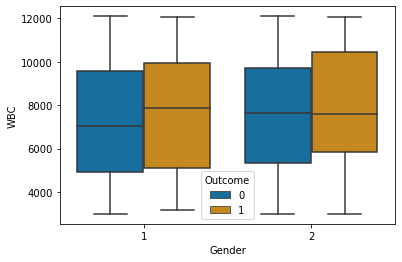

In [40]:
sns.boxplot(y='WBC', x='Gender',  
                 data=X_train, 
                 palette="colorblind",
                 hue='Outcome')

From the above plot it could be observed that somehow the White Blood Cells tends to be higher in patients with Cirrhosis.

## 8.- Dealing with missing values

#### a) Indicate which variables present null values and justify how you have identified them.

This specific database do not contain missing values and to prove it the following approaches were done.

In [41]:
# Checking if there are missing values
data.isnull().values.any()

False

In [42]:
# Adding up all the missing values of each column
data.isnull().sum()

Age                            0
Gender                         0
BMI                            0
Fever                          0
Nausea/Vomting                 0
Headache                       0
Diarrhea                       0
Fatigue&generalizedboneache    0
Jaundice                       0
Epigastricpain                 0
WBC                            0
RBC                            0
HGB                            0
Plat                           0
AST1                           0
ALT1                           0
ALT4                           0
ALT12                          0
ALT24                          0
ALT36                          0
ALT48                          0
ALTafter24w                    0
RNABase                        0
RNA4                           0
RNA12                          0
RNAEOT                         0
RNAEF                          0
BaselinehistologicalGrading    0
Baselinehistologicalstaging    0
Histologicalstaging            0
Outcome   

In [43]:
# Identify the number of '0' values per feature.
(data == 0).sum(axis=0)

Age                               0
Gender                            0
BMI                               0
Fever                             0
Nausea/Vomting                    0
Headache                          0
Diarrhea                          0
Fatigue&generalizedboneache       0
Jaundice                          0
Epigastricpain                    0
WBC                               0
RBC                               0
HGB                               0
Plat                              0
AST1                              0
ALT1                              0
ALT4                              0
ALT12                             0
ALT24                             0
ALT36                             0
ALT48                             0
ALTafter24w                       0
RNABase                           0
RNA4                              0
RNA12                             0
RNAEOT                            0
RNAEF                             0
BaselinehistologicalGrading 

In [44]:
# Identify the number of '0' values per observation (per patient).
(data == 0).sum(axis=1)

0       1
1       1
2       0
3       1
4       1
       ..
1380    0
1381    1
1382    1
1383    1
1384    1
Length: 1385, dtype: int64

##### Are all of them missing values?

No, zero values are only found in variable Outcome which indicates whether the patient has Cirrhosis or not (1 or 0).

##### What can we do?

We can eliminate these observations or we can replace them with a constant or with a statistic values.

#### b) Replace zeros with mean value

In [45]:
nonzero_mean = data[data != 0 ].mean()
print(nonzero_mean.round(3)) # Print the mean without missing values and rounding to avoid scientific notation

Age                                 46.319
Gender                               1.490
BMI                                 28.609
Fever                                1.516
Nausea/Vomting                       1.503
Headache                             1.496
Diarrhea                             1.503
Fatigue&generalizedboneache          1.499
Jaundice                             1.501
Epigastricpain                       1.504
WBC                               7533.386
RBC                            4422129.611
HGB                                 12.588
Plat                            158348.061
AST1                                82.775
ALT1                                83.916
ALT4                                83.406
ALT12                               83.510
ALT24                               83.709
ALT36                               83.118
ALT48                               83.630
ALTafter24w                         33.438
RNABase                         590951.219
RNA4       

Since there are no missing values in the whole database, there are also no missing values in neither the training nor the test set.

In [46]:
# Example given to replace zeros with mean values

# data['BMI'].replace([0],data['BMI'].mean(), inplace=True)

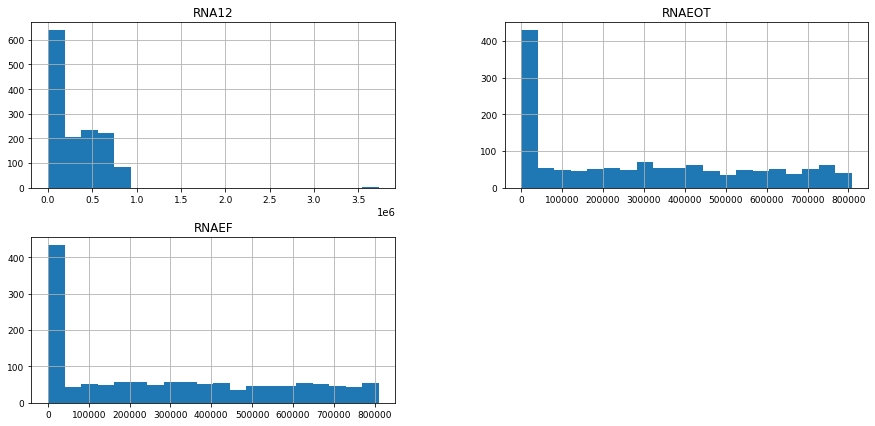

In [47]:
data.hist(column=['RNA12', 'RNAEOT', 'RNAEF'], figsize=(15, 7),
                   bins=20, xlabelsize=9, ylabelsize=9);

 In the case of RNA12, RNA end-of-treatment (RNAEOF) and RNA Elongation Factor (RNAEF), as we explained before, those variables can take values close to 0 as a result of a good response of the immune system to the treatment given (undetectable and unquantifiable levels of hepatits C virus RNA). Thus, those values are NOT interpreted as missing values or outliers and they will give us very important information related to the Outcome in further steps. 
 
 A further explanation regarding why the decline of viral RNA is an indicator of good response to the treatment could be found in the paper called '[Hepatitis C virus RNA kinetics during the initial 12 weeks treatment with pegylated interferon-alpha 2a and ribavirin according to virological response](https://pubmed.ncbi.nlm.nih.gov/16108761/)' written by Carlsson and colaborators.

## 9.- Dealing with outliers

##### a) Indicate which variables present anomalous values that could be eliminated and justify how you have identified them.

Histograms: thanks to the histograms, we can observe that the following variables have anomalous values that do not match the general behavior of the data.

- ALT36
- ALT48
- ALTafter24w
- RNA12

Boxplots: With this method, we will be able to only see the most outstanding outliers that are extremely far from the other values. Analyzing the boxplots of each of the variables, we can confirm that the following variables present relevant outliers.

- ALTafter24w
- RNA12


##### a) Identifying outliers with Histograms

Thanks to the histograms, we can observe that the following variables have anomalous values that do not match the general behavior of the data.

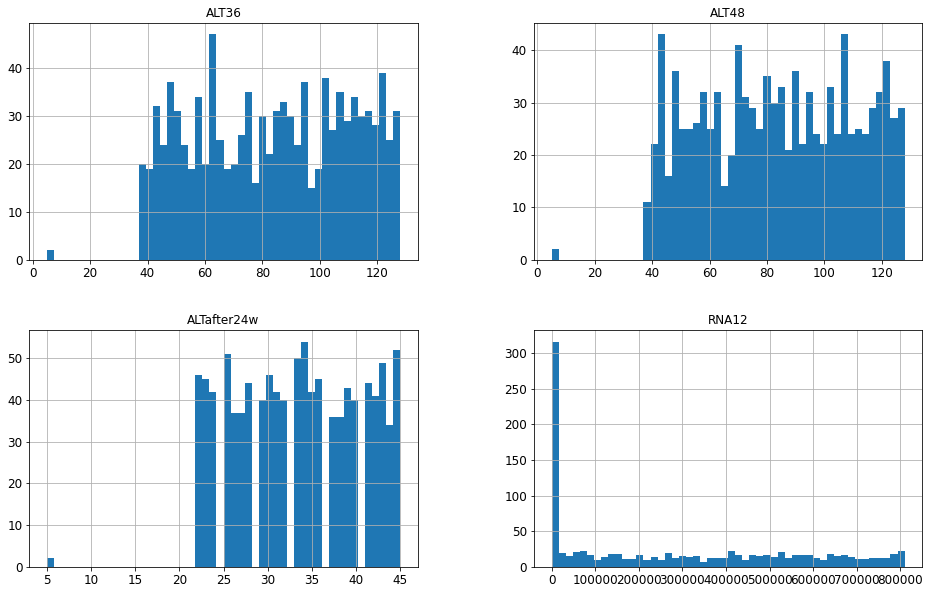

In [48]:
X_train.hist(column=['ALT36', 'ALT48', 'ALTafter24w', 'RNA12'], figsize=(16, 10),
                   bins=50, xlabelsize=12, ylabelsize=12);

##### b) Identifying outliers with Boxplots

With this method, we will be able to only see the most outstanding outliers that are extremely far from the other values. Analyzing the boxplots of each of the variables, we can confirm that the following variables present relevant outliers.

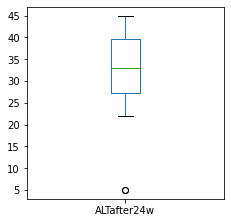

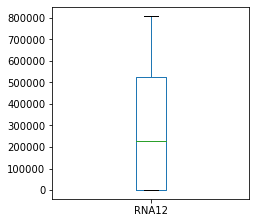

In [49]:
X_train['ALTafter24w'].plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(12,12))
plt.show()

X_train['RNA12'].plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(12,12))
plt.show()

#### c) Identifying Outliers with Interquartile Range

In [50]:
# Define the Quartiles and calculate the IQR
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

In [51]:
def outliers_iqr(headers):
    
    for header in headers:
        
        # Calculate the bounds
        lower_bound = Q1[header]-(1.5*IQR[header])
        upper_bound = Q1[header]+(1.5*IQR[header])
        
        # Identify the outliers below and above the bounds
        out1 = X_train[header].loc[data[header] < lower_bound].tolist()
        out2 = X_train[header].loc[data[header] > upper_bound].tolist()
        
        print()
        print(header.upper())
        
        print('Lower outliers:')
        print(out1)
        
        print('Upper outliers:')
        print(out2)

In [52]:
headers = ['ALTafter24w', 'RNA12']
outliers_iqr(headers)


ALTAFTER24W
Lower outliers:
[5, 5]
Upper outliers:
[]

RNA12
Lower outliers:
[]
Upper outliers:
[798485, 803685, 787815, 797451, 798150, 787605, 787295, 809245, 797895, 793752, 793701, 793474, 805218, 796911, 798534, 787967, 801981, 810028, 806109, 794351, 798990, 789173, 795047, 794687, 791212, 806651, 798473, 797579, 798555, 802517, 793719, 798117]


#### The special case of RNA12

 As we can observe in the Boxplot made in a), the interquarantile range (IQR) of RNA12 is closer to the minimum value of the whole dataset. Thus, identifying outliers with this method  is not advisable in this case, because we will interpret the values above the Upper Quartile (Q3) that are closer to the maximum value of the dataset as outliers, while those values are still within the normal range of the dataset.

That is the reason why we can observe so many outliers for RNA12 using this method.

#### d) Identifying and eliminating outliers with z-score

However, the z-score is a more efficient method to identify outliers in the case of RNA12.

In [53]:
import pandas as pd
from scipy import stats

# Z-score will be used for each sample on the data set
z_scores = stats.zscore(X_train['BMI'])

# It is going to be considered 3 times the standard deviation
abs_z_scores = np.abs(z_scores)
no_outliers = (abs_z_scores < 3)
new_data = X_train[no_outliers]

def outliers_zscore(headers):
    
    for header in headers:
        
        # Identify outliers
        z_scores1 = stats.zscore(X_train[header])
        abs_z_scores1 = np.abs(z_scores1)
        outliers1 = (abs_z_scores1 > 2)

        # Boxplot and mean with outliers
        print()
        print(header.upper())
        print(np.where(outliers1)[0]) # Print the positions of the outliers
        print()
        print('Mean with outliers:')
        print(X_train[header].mean())
        print()

        plt.figure(figsize = (12,4))
        ax1 = plt.subplot(1,2,1)
        ax1.boxplot(X_train[header])
        ax1.set_title('Boxplot ' + header + ' with outliers ')

        # Boxplot and mean without outliers
        print('Mean without outliers:')
        outl = ~(outliers1) #Invert the boolean array of outliers
        mean = X_train[header].iloc[outl.tolist()].mean() # Calculate the mean without the outliers
        print(mean)

        # We are considering that the outliers are samples of the dataset that belong to erroneous data. 
        # Thus, we are not taking into account those values for the calculation of the mean of the variable.

        # Replacing the outliers for the mean value
        X_train[header] = X_train[header].where(~(outliers1), mean)
        
        ax2 = plt.subplot(1,2,2)
        ax2.boxplot(X_train[header])
        ax2.set_title('Boxplot ' + header + ' without outliers ')
        plt.show()
        plt.show()


ALT36
[ 68 720]

Mean with outliers:
83.88535645472062

Mean without outliers:
84.0376447876448


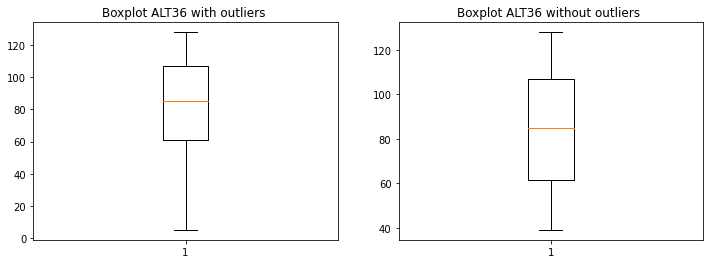


ALT48
[ 68 720]

Mean with outliers:
83.67630057803468

Mean without outliers:
83.82818532818533


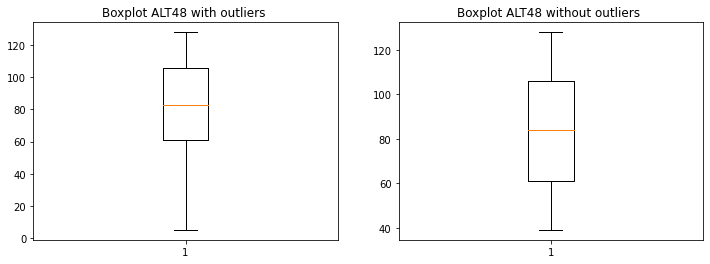


ALTAFTER24W
[ 68 720]

Mean with outliers:
33.407514450867055

Mean without outliers:
33.46235521235521


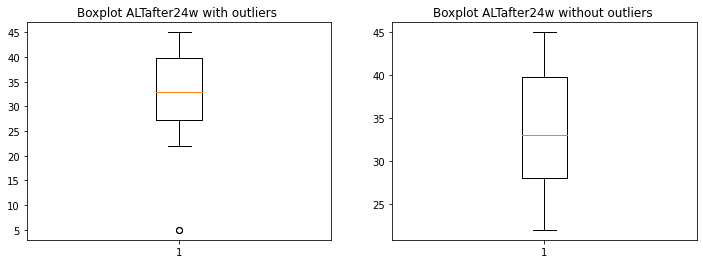


RNA12
[]

Mean with outliers:
284153.6377649326

Mean without outliers:
284153.6377649326


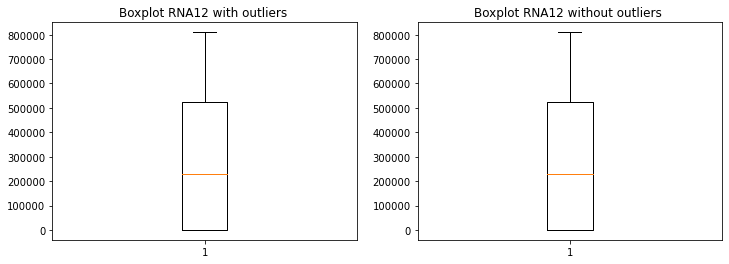

In [54]:
headers = ['ALT36', 'ALT48', 'ALTafter24w', 'RNA12']
outliers_zscore(headers)

## 10.- Dealing with imbalance classes

This occurs when the number of samples in one class is much higher than the number of samples in the another class. 

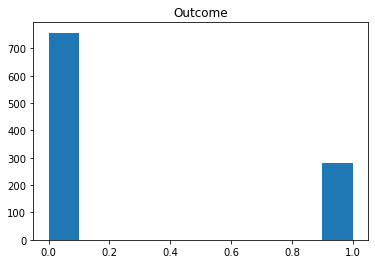

In [55]:
# The variable 'Outcome' indicates whether the patient has Cirrhosis or not (1 or 0).
plt.hist(X_train['Outcome'])
plt.title('Outcome')
plt.show()

#### a) Random Oversampling 
Randomly duplicate examples in the minority class. This method was selected because it was considered as the more appropiate in order to continue analyzing data without losing information of any sample.

Counter({0: 757, 1: 757})


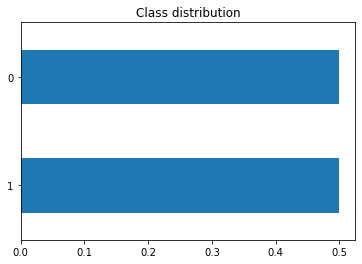

In [56]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

# Define Oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority')

# Fit and apply the transform
X_over, y_over = oversample.fit_resample(X_train[X_train.columns.difference(['Outcome','col'])], X_train.loc[:,'Outcome'])

# Summarize the new class distribution
class_distribution = pd.Series(y_over).value_counts(normalize = True)
ax = class_distribution.plot.barh()
ax.set_title("Class distribution")

print(Counter(y_over))

Changing the dataframe X_train and now the 'Outcome' column will have the result of the oversampling. Therefore, this variable will be already balanced in the training test which is important for the training of the future algorithm.

In [57]:
# This way of inserting the Outcome values assures that they will be inserted in the right place where they should be.
X_over['Outcome'] = pd.Series(y_over.values.tolist(), index = y_over.index.tolist())
X_train = X_over

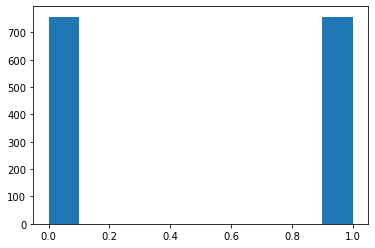

In [58]:
plt.hist(X_train['Outcome']);

## 11.- One-hot Encoding

A one-hot encoding transformation would be applied to the 'Histological Staging' variable in such a way that this categorical variable is transformed into a group of numerical variables that enables future data processing.

In [59]:
from sklearn.preprocessing import OneHotEncoder

# Creating instance of one-hot-encoder
enc = OneHotEncoder(handle_unknown='ignore')

# One-hot encoding for the training set.
enc_X_train = pd.DataFrame(enc.fit_transform(X_train[['Histologicalstaging']]).toarray())

# Identify categories.
print(X_train['Histologicalstaging'].value_counts())

# A table describing each different cirrhotic stage in the training set is created below.
enc_X_train.describe()

Cirrhosis         757
ManySepta         263
FewSepta          249
PortalFibrosis    245
NoFibrosis          0
Name: Histologicalstaging, dtype: int64
0        FewSepta
1        FewSepta
2        FewSepta
3       ManySepta
4       Cirrhosis
          ...    
1509    Cirrhosis
1510    Cirrhosis
1511    Cirrhosis
1512    Cirrhosis
1513    Cirrhosis
Name: Histologicalstaging, Length: 1514, dtype: category
Categories (5, object): ['NoFibrosis' < 'PortalFibrosis' < 'FewSepta' < 'ManySepta' < 'Cirrhosis']


,0,1,2,3
count,1514.000000,1514.000000,1514.000000,1514.000000
mean,0.500000,0.164465,0.173712,0.161823
std,0.500165,0.370819,0.378987,0.368410
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000


In [60]:
# Performing one-hot encoding.
Histologicalstaging_onehot = pd.get_dummies(X_train.Histologicalstaging, prefix='Staging')

# Visualizing the first rows to make sure the encoding was succesfully done.
print(Histologicalstaging_onehot .head())

histoarray = Histologicalstaging_onehot.to_numpy()

   Staging_NoFibrosis  Staging_PortalFibrosis  Staging_FewSepta  \
0                   0                       0                 1   
1                   0                       0                 1   
2                   0                       0                 1   
3                   0                       0                 0   
4                   0                       0                 0   

   Staging_ManySepta  Staging_Cirrhosis  
0                  0                  0  
1                  0                  0  
2                  0                  0  
3                  1                  0  
4                  0                  1  


Adding an extra column to the training dataframe for each category inside the 'Histologicalstaging' variable, so that the information inside 'Histologicalstaging' is contained inside the other variables. 

In [ ]:
X_train = pd.concat([data,pd.get_dummies(X_train['Histologicalstaging'], prefix='Staging')], axis=1) #Add new features in the previous database.
X_train.describe()

In [62]:
# One-hot encoding for the test set.

enc_X_test = pd.DataFrame(enc.fit_transform(X_test[['Histologicalstaging']]).toarray())

# Identifity categories
print(X_test['Histologicalstaging'].value_counts()) 

# A table describing each different cirrhotic stage in the test set is created below.
enc_X_test.describe()

ManySepta         92
PortalFibrosis    91
FewSepta          83
Cirrhosis         81
NoFibrosis         0
Name: Histologicalstaging, dtype: int64


,0,1,2,3
count,347.000000,347.000000,347.00000,347.000000
mean,0.233429,0.239193,0.26513,0.262248
std,0.423624,0.427207,0.44204,0.440492
min,0.000000,0.000000,0.00000,0.000000
25%,0.000000,0.000000,0.00000,0.000000
50%,0.000000,0.000000,0.00000,0.000000
75%,0.000000,0.000000,1.00000,1.000000
max,1.000000,1.000000,1.00000,1.000000


In [63]:
# Performing one-hot encoding.
Histologicalstaging_onehot = pd.get_dummies(X_test.Histologicalstaging, prefix='Staging')

# Visualizing the first rows to make sure the encoding was succesfully done.
print(Histologicalstaging_onehot .head())

histoarray = Histologicalstaging_onehot.to_numpy()

      Staging_NoFibrosis  Staging_PortalFibrosis  Staging_FewSepta  \
659                    0                       0                 1   
956                    0                       1                 0   
4                      0                       1                 0   
1366                   0                       0                 0   
137                    0                       0                 0   

      Staging_ManySepta  Staging_Cirrhosis  
659                   0                  0  
956                   0                  0  
4                     0                  0  
1366                  0                  1  
137                   1                  0  


Adding an extra column to the test dataframe for each category inside the 'Histologicalstaging' variable, so that the information inside 'Histologicalstaging' is contained inside the other variables. 

In [64]:
X_test = pd.concat([data,pd.get_dummies(X_test['Histologicalstaging'], prefix='Staging')], axis=1) #Add new features in the previous database.
X_test.describe()

,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue&generalizedboneache,Jaundice,Epigastricpain,...,RNAEOT,RNAEF,BaselinehistologicalGrading,Baselinehistologicalstaging,Outcome,Staging_NoFibrosis,Staging_PortalFibrosis,Staging_FewSepta,Staging_ManySepta,Staging_Cirrhosis
count,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,...,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,347.0,347.000000,347.000000,347.00000,347.000000
mean,46.319134,1.489531,28.608664,1.515523,1.502527,1.496029,1.502527,1.498917,1.501083,1.503971,...,287660.336462,291378.290975,9.761733,2.536462,0.261372,0.0,0.262248,0.239193,0.26513,0.233429
std,8.781506,0.500071,4.076215,0.499939,0.500174,0.500165,0.500174,0.500179,0.500179,0.500165,...,264559.525070,267700.691713,4.023896,1.121392,0.439541,0.0,0.440492,0.427207,0.44204,0.423624
min,32.000000,1.000000,22.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,5.000000,3.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.000000
25%,39.000000,1.000000,25.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,5.000000,6.000000,2.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.000000
50%,46.000000,1.000000,29.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,...,251376.000000,244049.000000,10.000000,3.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.000000
75%,54.000000,2.000000,32.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,517806.000000,527864.000000,13.000000,4.000000,1.000000,0.0,1.000000,0.000000,1.00000,0.000000
max,61.000000,2.000000,35.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,808450.000000,810333.000000,16.000000,4.000000,1.000000,0.0,1.000000,1.000000,1.00000,1.000000


## 12.- Normalization

#### a) Standardization

By applying standardization, each column will have mean  0 and the standard deviation 1.

The normalization will be done using only the average of the training subset and applying it on the test subset.

For applying normalization, the categorical variables (already converted to continuous ones through one-hot encoding) must be first eliminated.

In [65]:
X_train1 = X_train.drop(labels='Histologicalstaging', axis=1)
X_test1 = X_test.drop(labels='Histologicalstaging', axis=1)

It is going to be used the mean and the standard desviation of the training set, to normalize the test set. In a real scenario, the test set it not known in advance.

In [67]:
from sklearn.preprocessing import StandardScaler

# Normalize variables using Standardization.
scaler = StandardScaler()
scaler.fit(X_train1)
X_train_norm = scaler.transform(X_train1)
X_test_norm = scaler.transform(X_test1) 